<img src="RR1.png" alt="drawing" style="width:800px;"/><br>

<br><b><font size="5"> Challenge 1 - How might we optimize flight schedules that take into consideration factors such as weather and conjestion?</font></b>

<b><font size="4"><font color="#800080"><p style="font-family:Lato Light;"> WHAT: </p></font></font></b>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Flight scheduling</b> is a real challenge that airports and airlines face. Each week, about 7,200 flights land or depart from Changi, with more than 62.2 million passengers passing through the airport a year. Air traffic control needs to ensure <b>on time performance</b> of flights, taking into consideration <b>many flights and factors affecting arrival.</b><br><br>
<b><font size="4"><font color="#800080"><p style="font-family:Lato Light;"> WHY: </p></font></font></b>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Flight delays</b> can cause high costs from <b>misconnections, extra fuel burn and holdings</b> etc. Many factors can affect flight schedules, <b>weather and congestion</b> is just two from the list. What else can affect flight schedules? What can we do to predict conditions and optimize flight scheduling?<br><br>
<b><font size="4"><font color="#800080"><p style="font-family:Lato Light;"> HOW: </p></font></font></b>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Better air traffic management</b> to better serve passengers and increase satisfaction

<b><font size="4"><p style="font-family:Lato;">The below details are answered as a part of the challenge</p></font></b><br>
<b><font size="4"><font color="#D2691E"><p style="font-family:Dusha V5;"> How to address the challenge statement ? </p></font></font></b>
<font size="3"><p style="font-family:Lato;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In the below machine learning methods we have applied various classification techniques to categorize the best combination of parameters for the most efficient flight journey, both for the passenger and the aircraft owners.The straight target factors for optimizng the flight schedules is the consideration of three most important parameters - <u><font size="4">Weather, air traffic and maintenance</font></u>.<b>In addition to the above machine learning approach we have applied the time series analysis to plot the pattern and trend of different air traffic and weather conditions</b><br><br>
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. The first and the foremost parameter is the <u><b>Weather</b></u>. We have analyzed all the different influential actions by the weather on the flight journey. Analysing all possible combinations of weather parameters on the flight journey over the period of time gave us the most thoughtful insight on optimizing the future flight travels from or to a location. We have analyzed the cloud height in combination with the ambient location temperature and dew point temperature from the meta data, to know the effect of fog and mist for the flight travel. Secondly, we have analyzed seperately the relative humidity of the locations to know the possibility of rain. Finally and the most important factor of th weather is the wind direction. I have analyzed the best route for an aircraft to progress and the most efficient direction to travel to omptimze the fuel burnt in the action. the best locations that have the aid of wind for its flight and the locations that have their fuel burnt a lot becasue of the excessive drag caused by the wind flowing in the opposite direction.<br><br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. The second most important parameter is the <u><b>Air Traffic</b></u>. The air traffic is the number of flights blocked in at the destination location and the number of flights which are blocked out at the origin location. The blockage would be because of any unwanted or unprecedented maintenance of the aircraft at the origin location or too much aircraft conjestion of aircrafts flying over or in the runway. The time series analysis of the mean blockage time in and out at the Destination and the Origin location gives us the futuristic projection of blocakge degree at the intended location and the reasons for blockage. We need to get furthur more details of the environment data to know the actual reasons for the blockage.<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3. The third and final feature of importance is the <u><b>Maintenance</b></u>. The challenge question however needs the details of the different scheduled maintenance and maintenance of different parts of aircraft. But we dont have any dataset for this description, hence we exclude the analysis of the optimization of flight schedules with the maintenance part and we analyze the challenge 1 with the analysis of weather and the air traffic. </p></font>

<b><font size="4"><font color="#D2691E"><p style="font-family:Dusha V5;"> Rolls-Royce Data Innovation Challenge -Asia Abstract </p></font></font></b>
<img src="RR_Abstract_1.png" alt="drawing" style="width:800px;"/><br>

<b><font size="4"><font color="#0000A0"><p style="font-family:Dusha V5;"> The below machine learning apprach is the entore analysis made for the challenge 1 </p></font></font></b><br>
The below apprach involves the code - insights and the apprach why the method was used.

In [1]:
# ALl the libraries needed for the analysis is imported
import pandas as pd
import numpy as np
from numpy import meshgrid
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
from haversine import haversine
import math as m
from mpl_toolkits.basemap import Basemap
from cartopy import config
import cartopy.crs as ccrs

In [2]:
#Importing the Flight Information dataset (A dataset which is a subset of the metadataset)
flight_info = pd.read_csv("Sample+Data/Sample_1 - Flight Information.csv")

#Importing the sample metadataset (A dataset - compilation of all the information)
flight_meta = pd.read_csv("Sample+Data/Sample_2 - Metar.csv")

flight_meta.shape, flight_info.shape

((242, 41), (242, 10))

<u><b><font size="5"><font color="#0000A0"><p style="font-family:Bodoni MT;"> Inference 1 </p></font></font></b></u>
<font size="3"><font color="#8B4513">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. The flight information dataset contains a total of 242 rows with 10 columns and the meta data dataset has 242 rows and 41 columns</font></font>

In [3]:
#To get the column name information from both the imported dataset
list(flight_info), list(flight_meta)

(['Ident',
  'Aircraft Type',
  'Origin',
  'Destination',
  'Scheduled Block Out',
  'Actual Block Out',
  'Actual Departuretime',
  'Actual Arrival Time',
  'Scheduled Block In',
  'Actual Block In'],
 ['Flight ID',
  'Ident',
  'Origin',
  'Destination',
  'Actual Departure Time',
  'Actual Arrival Time',
  'Estimated Arrival Time',
  'Origin METAR Station (ICAO)',
  'Time (UTC)',
  'Flight Rules',
  'Wind Dir.',
  'Wind Speed (kts)',
  'Wind Gust (kts)',
  'Cloud Type',
  'Cloud Height (ft AGL)',
  'Visibility (sm)',
  'Temp (C)',
  'Temp (F)',
  'Dew Point (C)',
  'Dew Point (F)',
  'Rel. Humidity (%)',
  'Pressure (inches Hg)',
  'Other',
  'METAR text',
  'Destination METAR Station (ICAO)',
  'Time (UTC).1',
  'Flight Rules.1',
  'Wind Dir..1',
  'Wind Speed (kts).1',
  'Wind Gust (kts).1',
  'Cloud Type.1',
  'Cloud Height (ft AGL).1',
  'Visibility (sm).1',
  'Temp (C).1',
  'Temp (F).1',
  'Dew Point (C).1',
  'Dew Point (F).1',
  'Rel. Humidity (%).1',
  'Pressure (inches Hg

In [4]:
#We have dropped the redundant columns present in the flight_information dataset which are already available at the metadata.
flight_meta = flight_meta.drop(columns={"Origin","Destination","Actual Arrival Time","Temp (F)","Dew Point (F)","Temp (F).1",
                                        "Dew Point (F).1"})

#We do the renaming of the columns in the metadata, to have the columns robust and reproducible
flight_meta = flight_meta.rename(columns={'Time (UTC).1':'D_Time (UTC)','Time (UTC)':'O_Time (UTC)',
                                          'Flight Rules':'O_Flight Rules','Wind Dir.':'O_Wind Direction',
                                          'Wind Speed (kts)':'O_Wind Speed (kts)','Wind Gust (kts)':'O_Wind Gust (kts)',
                                          'Cloud Type':'O_Cloud Type','Cloud Height (ft AGL)':'O_Cloud Height (ft AGL)',
                                          'Visibility (sm)':'O_Visibility (sm)','Temp (C)':'O_Temp (C)',
                                          'Dew Point (C)':'O_Dew Point (C)','Rel. Humidity (%)':'O_Rel. Humidity (%)',
                                          'Pressure (inches Hg)':'O_Pressure (inches Hg)','Other':'O_Other',
                                          'METAR text':'O_METAR text','Flight Rules.1':'D_Flight Rules',
                                          'Wind Dir..1':'D_Wind Direction','Wind Speed (kts).1':'D_Wind Speed (kts)',
                                          'Wind Gust (kts).1':'D_Wind Gust (kts)','Cloud Type.1':'D_Cloud Type',
                                          'Cloud Height (ft AGL).1':'D_Cloud Height (ft AGL)',
                                          'Visibility (sm).1':'D_Visibility (sm)','Temp (C).1':'D_Temp (C)',
                                          'Dew Point (C).1':'D_Dew Point (C)','Rel. Humidity (%).1':'D_Rel. Humidity (%)',
                                          'Pressure (inches Hg).1':'D_Pressure (inches Hg)','Other.1':'D_Other',
                                          'METAR text.1':'D_METAR text'})

#We change the wind speed columns from the unit of knot to kilometer per minute
flight_meta["O_Wind Speed (kts)"] = flight_meta["O_Wind Speed (kts)"]*(1.852/60)
flight_meta["O_Wind Gust (kts)"] = flight_meta["O_Wind Gust (kts)"]*(1.852/60)
flight_meta["D_Wind Gust (kts)"] = flight_meta["D_Wind Gust (kts)"]*(1.852/60)
flight_meta["D_Wind Speed (kts)"] = flight_meta["D_Wind Speed (kts)"]*(1.852/60)

#We rename the 4 columns of wind speed and wind gust into the more relevant name
flight_meta = flight_meta.rename(columns={'O_Wind Speed (kts)':'O_Wind Speed (km/min)',
                                          'O_Wind Gust (kts)':'O_Wind Gust (km/min)',
                                          'D_Wind Gust (kts)':'D_Wind Gust (km/min)',
                                          'D_Wind Speed (kts)':'D_Wind Speed (km/min)'})
flight_meta.shape

(242, 34)

In [5]:
#We need to remove the rows that have missing values in the Actual Arrival time, Scheduled Block out and Actual Block In,
#as they are meaningless to be included in the analysis
flight_info = flight_info.drop(flight_info.index[[124,137,138,187]])
flight_meta = flight_meta.drop(flight_meta.index[[124,137,138,187]])

#We then reset the index for the proper working of the for loops and drop the extra created index column
flight_info = flight_info.reset_index()
flight_meta = flight_meta.reset_index()
flight_info = flight_info.drop(columns=["index"])
flight_meta = flight_meta.drop(columns=["index"])

In [6]:
#We then create a key coun by the concatenation of Ident of the aircraft and actual departure time,
#as they both are the commonly present columns in the flight information and the meta data datasets
flight_info["concat"] = "Nan"
flight_meta["concat"] = "Nan"

for i in range(0,len(flight_info)):
    flight_info["concat"][i] = flight_info["Ident"][i]+flight_info["Actual Departuretime"][i]
for i in range(0,len(flight_meta)):
    flight_meta["concat"][i] = flight_meta["Ident"][i]+flight_meta["Actual Departure Time"][i]

C:\Users\Lokesh Vairamuthu\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [7]:
# Then we rename the Actual departuretime into Actual Departure Time and drop the source columns as they complicate the dataset
flight_info = flight_info.rename(columns={'Actual Departuretime':'Actual Departure Time'})
flight_meta = flight_meta.drop(columns=["Actual Departure Time", "Ident"])

In [8]:
# Then we merge both the dataset and drop the key column as it is not required and the extra present Estimated arrival time as it is null
flight = pd.merge(flight_info, flight_meta, on="concat", how="left")
flight = flight.drop(columns=["Estimated Arrival Time", "concat"])

In [9]:
#We format all the datetime columns from string to the datetime format for furthur analysis
for i in range(0, len(flight)):
    flight["Scheduled Block Out"][i] = datetime.strptime(flight["Scheduled Block Out"][i], '%d/%m/%Y %H:%M')
    flight["Scheduled Block In"][i] = datetime.strptime(flight["Scheduled Block In"][i], '%d/%m/%Y %H:%M')
    flight["Actual Block In"][i] = datetime.strptime(flight["Actual Block In"][i], '%d/%m/%Y %H:%M')
    flight["Actual Block Out"][i] = datetime.strptime(flight["Actual Block Out"][i], '%d/%m/%Y %H:%M')
    flight["Actual Departure Time"][i] = datetime.strptime(flight["Actual Departure Time"][i], '%d/%m/%Y %H:%M')
    flight["Actual Arrival Time"][i] = datetime.strptime(flight["Actual Arrival Time"][i], '%d/%m/%Y %H:%M')
    flight["O_Time (UTC)"][i] = datetime.strptime(flight["O_Time (UTC)"][i], '%d/%m/%Y %H:%M')
    flight["D_Time (UTC)"][i] = datetime.strptime(flight["D_Time (UTC)"][i], '%d/%m/%Y %H:%M')

C:\Users\Lokesh Vairamuthu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Lokesh Vairamuthu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Lokesh Vairamuthu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-c

<u><b><font size="5"><font color="#0000A0"><p style="font-family:Bodoni MT;"> Inference 2 </p></font></font></b></u>
<font size="3"><font color="#8B4513">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. There are 8 columns in the final "flight" dataset that needs to be changed from the string format of (day, month, Year Hour:Minute:Second) into a datetime format to have the valeus being used for the furthur date related analysis - to find the difference between departure time and arrival time, difference between the Scheduled Block Out time and Actual Block Out time, the difference between the Scheduled Blovk In time and the Actual Block In time.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. In addition to this, we also need the datetime columns to be in the same format to analyze the time series analysis over different parameters on selective locations</font></font>

In [10]:
#Importing of the Airport Latitude and Longitude Dataset to get the airport full name and the latitude and longitude of the airport location
#We create 2 datasets of the same data, to merge for Origin location and Destination location
a_latlon1 = a_latlon2 = pd.read_csv('Sample+Data/Airport_Latlon.txt', encoding='latin-1')

In [11]:
#We have uneccesary columns in the Airport Latitude and Longitude dataset, hence we remove those columns and have the required only
a_latlon1 = a_latlon1.drop(columns={"type","elevation_ft","continent","iso_region","municipality","gps_code",
                                    "iata_code","local_code","iso_country"})
a_latlon2 = a_latlon2.drop(columns={"type","elevation_ft","continent","iso_region","municipality","gps_code",
                                    "iata_code","local_code","iso_country"})

In [12]:
#We rename the columns in the datasets to the most easy names for reproducibility 
a_latlon1 = a_latlon1.rename(columns={"ident":"Origin"})
a_latlon1 = a_latlon1.rename(columns={"name":"Origin_location"})
a_latlon2 = a_latlon2.rename(columns={"ident":"Destination"})
a_latlon2 = a_latlon2.rename(columns={"name":"Destination_location"})

In [13]:
#We split the coordinates column into latitude and longitude column seperately
x = a_latlon1["coordinates"].str.split(",", n = 1, expand = True)
y = a_latlon2["coordinates"].str.split(",", n = 1, expand = True)
a_latlon1["Origin_Longitude"] = x[0]
a_latlon1["Origin_Latitude"] = x[1]
a_latlon2["Destination_Longitude"] = y[0]
a_latlon2["Destination_Latitude"] = y[1]

In [14]:
#Finally we merge the latitude and longitude datasets into the flight dataset to have the complete data for the analysis
flight = pd.merge(flight, a_latlon1, on="Origin", how="left")
flight = pd.merge(flight, a_latlon2, on="Destination", how="left")

flight = flight.drop(columns={"coordinates_x","coordinates_y"})

#We change the latitude and longitude from string to float format
for i in range(0, len(flight)):
    flight["Destination_Latitude"][i] = float(flight["Destination_Latitude"][i])
    flight["Destination_Longitude"][i] = float(flight["Destination_Longitude"][i])
    flight["Origin_Latitude"][i] = float(flight["Origin_Latitude"][i])
    flight["Origin_Longitude"][i] = float(flight["Origin_Longitude"][i])

C:\Users\Lokesh Vairamuthu\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Lokesh Vairamuthu\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Lokesh Vairamuthu\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by Interac

<u><b><font size="5"><font color="#0000A0"><p style="font-family:Bodoni MT;"> Reference of Haversine Distance </p></font></font></b></u><br>
<font size="3"><font color="#8B4513">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes. Important in navigation, it is a special case of a more general formula in spherical trigonometry, the law of haversines, that relates the sides and angles of spherical triangles.<br><br>

The first table of haversines in English was published by James Andrew in 1805, but Florian Cajori credits an earlier use by José de Mendoza y Ríos in 1801. The term haversine was coined in 1835 by James Inman.<br><br>

These names follow from the fact that they are customarily written in terms of the haversine function, given by haversin(θ) = sin^2(θ/2). The formulas could equally be written in terms of any multiple of the haversine, such as the older versine function (twice the haversine). Prior to the advent of computers, the elimination of division and multiplication by factors of two proved convenient enough that tables of haversine values and logarithms were included in 19th and early 20th century navigation and trigonometric texts. These days, the haversine form is also convenient in that it has no coefficient in front of the sin2 function.</font></font>

In [15]:
#we implement the haversine geospatial distance to calculate the distance between the Origin location and the Destination location
def haver(x, y, p, q):
    s1 = m.sin(((x*m.pi/180) - (p*m.pi/180))/2)
    c1 = m.cos(x*m.pi/180)
    c2 = m.cos(p*m.pi/180)
    s2 = m.sin(((y*m.pi/180) - (q*m.pi/180))/2)
    a = (s1*s1)+(c1*c2*s2*s2)
    c = 2*(m.atan2(m.sqrt(a), m.sqrt(1-a)))
    d = 6372*c
    return d

flight["Haversine_distance in kms"] = 0.00
for i in range(0, len(flight)):
    flight["Haversine_distance in kms"][i] = haver(flight["Destination_Latitude"][i],
                                                flight["Destination_Longitude"][i],
                                                flight["Origin_Latitude"][i], flight["Origin_Longitude"][i])

C:\Users\Lokesh Vairamuthu\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [16]:
#We then calculate the differencec between the Scheduled Block out and Actual Block Out; and Scheduled Block In
#and the Actual Block In to find which aircraft ident has travlled the most effective on time flight schedule
flight["delta_Block_Out"] = 0.00
flight["delta_Block_In"] = 0.00
flight["Travel_Time"] = 0.00

#We have applied the 900 mark condition to get the round-the-clock difference in the blockage in minutes. i.e, We have the
#flight schedule moving round the clock, for blockage scheduled the day before and the actual blockage is today, then the formula
#calculates a whole 1440 minutes into the final answers, hence the approach
for i in range(0, len(flight)):
    if((flight["Scheduled Block Out"][i] - flight["Actual Block Out"][i]).seconds/60 > 900):
        flight["delta_Block_Out"][i] = (((flight["Scheduled Block Out"][i] - flight["Actual Block Out"][i]).seconds/60)-1440.00)
    else:
        flight["delta_Block_Out"][i] = (flight["Scheduled Block Out"][i] - flight["Actual Block Out"][i]).seconds/60
    
for i in range(0, len(flight)):
    if((flight["Scheduled Block In"][i] - flight["Actual Block In"][i]).seconds/60 > 900):
        flight["delta_Block_In"][i] = (((flight["Scheduled Block In"][i] - flight["Actual Block In"][i]).seconds/60)-1440.00)
    else:
        flight["delta_Block_In"][i] = (flight["Scheduled Block In"][i] - flight["Actual Block In"][i]).seconds/60        
    
for i in range(0, len(flight)):
    flight["Travel_Time"][i] = (flight["Actual Arrival Time"][i] - flight["Actual Departure Time"][i]).seconds/60

C:\Users\Lokesh Vairamuthu\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Lokesh Vairamuthu\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Lokesh Vairamuthu\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Lokesh Vairamuthu\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: Setting

In [17]:
#We calculated the geospatial angle between the Origin location and the Destination location and vice versa to get it mapped with
#the wind direction, to calculate the effect of wind direction towards an aircraft travel
flight["O-D_Dir"] = 0.00
flight["D-O_Dir"] = 0.00

for i in range(0, len(flight)):
    if(flight["Origin_Latitude"][i] == flight["Destination_Latitude"][i] and flight["Origin_Longitude"][i] > flight["Destination_Longitude"][i]):
        flight["O-D_Dir"][i] = 270
    elif(flight["Origin_Latitude"][i] == flight["Destination_Latitude"][i] and flight["Origin_Longitude"][i] < flight["Destination_Longitude"][i]):
        flight["O-D_Dir"][i] = 90
    elif(flight["Origin_Longitude"][i] == flight["Destination_Longitude"][i] and flight["Origin_Latitude"][i] > flight["Destination_Latitude"][i]):
        flight["O-D_Dir"][i] = 180
    elif(flight["Origin_Longitude"][i] == flight["Destination_Longitude"][i] and flight["Origin_Latitude"][i] < flight["Destination_Latitude"][i]):
        flight["O-D_Dir"][i] = 360
    elif(flight["Origin_Latitude"][i] < flight["Destination_Latitude"][i] and flight["Origin_Longitude"][i] < flight["Destination_Longitude"][i]):
        flight["O-D_Dir"][i] = 90 - m.degrees(m.atan((flight["Destination_Longitude"][i]-flight["Origin_Longitude"][i])/(flight["Destination_Latitude"][i]-flight["Origin_Latitude"][i])))
    elif(flight["Origin_Latitude"][i] > flight["Destination_Latitude"][i] and flight["Origin_Longitude"][i] < flight["Destination_Longitude"][i]):
        flight["O-D_Dir"][i] = 90 + abs(m.degrees(m.atan((flight["Destination_Longitude"][i]-flight["Origin_Longitude"][i])/(flight["Destination_Latitude"][i]-flight["Origin_Latitude"][i]))))
    elif(flight["Origin_Latitude"][i] > flight["Destination_Latitude"][i] and flight["Origin_Longitude"][i] > flight["Destination_Longitude"][i]):
        flight["O-D_Dir"][i] = 270 - m.degrees(m.atan((flight["Destination_Longitude"][i]-flight["Origin_Longitude"][i])/(flight["Destination_Latitude"][i]-flight["Origin_Latitude"][i])))
    elif(flight["Origin_Latitude"][i] < flight["Destination_Latitude"][i] and flight["Origin_Longitude"][i] > flight["Destination_Longitude"][i]):
        flight["O-D_Dir"][i] = 270 + abs(m.degrees(m.atan((flight["Destination_Longitude"][i]-flight["Origin_Longitude"][i])/(flight["Destination_Latitude"][i]-flight["Origin_Latitude"][i]))))

for i in range(0, len(flight)):
    if(flight["Origin_Latitude"][i] == flight["Destination_Latitude"][i] and flight["Origin_Longitude"][i] > flight["Destination_Longitude"][i]):
        flight["D-O_Dir"][i] = 90
    elif(flight["Origin_Latitude"][i] == flight["Destination_Latitude"][i] and flight["Origin_Longitude"][i] < flight["Destination_Longitude"][i]):
        flight["D-O_Dir"][i] = 270
    elif(flight["Origin_Longitude"][i] == flight["Destination_Longitude"][i] and flight["Origin_Latitude"][i] > flight["Destination_Latitude"][i]):
        flight["D-O_Dir"][i] = 360
    elif(flight["Origin_Longitude"][i] == flight["Destination_Longitude"][i] and flight["Origin_Latitude"][i] < flight["Destination_Latitude"][i]):
        flight["D-O_Dir"][i] = 180
    elif(flight["Destination_Latitude"][i] < flight["Origin_Latitude"][i] and flight["Destination_Longitude"][i] < flight["Origin_Longitude"][i]):
        flight["D-O_Dir"][i] = 90 - m.degrees(m.atan((flight["Origin_Longitude"][i]-flight["Destination_Longitude"][i])/(flight["Origin_Latitude"][i]-flight["Destination_Latitude"][i])))
    elif(flight["Destination_Latitude"][i] > flight["Origin_Latitude"][i] and flight["Destination_Longitude"][i] < flight["Origin_Longitude"][i]):
        flight["D-O_Dir"][i] = 90 + abs(m.degrees(m.atan((flight["Origin_Longitude"][i]-flight["Destination_Longitude"][i])/(flight["Origin_Latitude"][i]-flight["Destination_Latitude"][i]))))
    elif(flight["Destination_Latitude"][i] > flight["Origin_Latitude"][i] and flight["Destination_Longitude"][i] > flight["Origin_Longitude"][i]):
        flight["D-O_Dir"][i] = 270 - m.degrees(m.atan((flight["Origin_Longitude"][i]-flight["Destination_Longitude"][i])/(flight["Origin_Latitude"][i]-flight["Destination_Latitude"][i])))
    elif(flight["Destination_Latitude"][i] < flight["Origin_Latitude"][i] and flight["Destination_Longitude"][i] > flight["Origin_Longitude"][i]):
        flight["D-O_Dir"][i] = 270 + abs(m.degrees(m.atan((flight["Origin_Longitude"][i]-flight["Destination_Longitude"][i])/(flight["Origin_Latitude"][i]-flight["Destination_Latitude"][i]))))


C:\Users\Lokesh Vairamuthu\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Lokesh Vairamuthu\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Lokesh Vairamuthu\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Lokesh Vairamuthu\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: Settin

<u><b><font size="5"><font color="#0000A0"><p style="font-family:Bodoni MT;"> Inference 3 </p></font></font></b></u>
<font size="3"><font color="#8B4513">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. We have a column called the "Wind Direction", which is calculated by the following:-<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;If the wind direction is given to flow at a location "A" at a degree 45, this means that the wind flows towards the location "A" at an angle 45 from the north in the clockwise direction.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. The Wind direction gievn in the dataset can be used only if it is linked to the flight motion, so we have assumed that the aircraft moves from the Origin location towards the Destination location along the rigid geospatial angle between them.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3. The angle by which the wind direction is calculated is the same way by which the angle between the Origin and the Destination is calculated, to note: <b>The angle between Origin and Destination is different from the angle between Destination and Origin</b><br><br>.&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4. By all these analysis we have calcualted the geo angle between Origin and Destination & Destination and Origin.</font></font>

<u><b><font size="5"><font color="#0000A0"><p style="font-family:Bodoni MT;"> Intro to the analysis </p></font></font></b></u>
<font size="3"><font color="#8B4513">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Below are several analysis made for the understanding of the aircraft flight schedule analysis and the approach to find the optimzed weather and air traffic parameters to have the most optimized flight schedule plan</font></font>

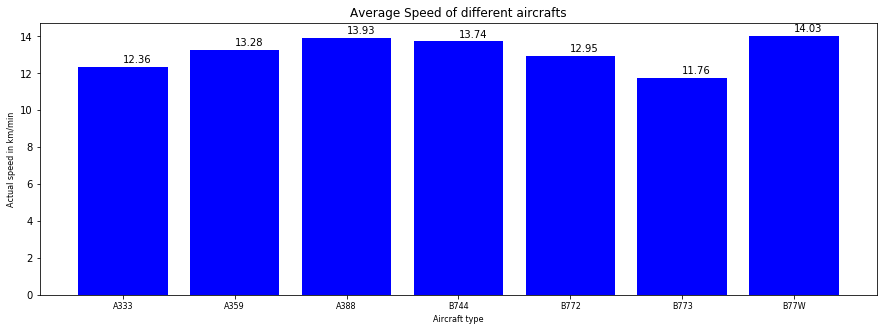

In [18]:
#We plot the average speed of the different aircrafts given in the dataset
a = {'Aircraft_type': flight["Aircraft Type"], 'Velocity in km/min': flight["Haversine_distance in kms"]/flight["Travel_Time"]}
flight_velocity = pd.DataFrame(data=a)
flight_velocity = flight_velocity.groupby('Aircraft_type').mean()
flight_velocity = flight_velocity.reset_index()

plt.figure(figsize=(15, 5))
plt.bar(flight_velocity["Aircraft_type"], flight_velocity["Velocity in km/min"], color='#0000FF')
plt.xlabel('Aircraft type', fontsize=8)
plt.ylabel('Actual speed in km/min', fontsize=8)
plt.xticks(range(7), flight_velocity["Aircraft_type"], fontsize=8, rotation=0)
plt.title('Average Speed of different aircrafts')
for i in range(0,len(flight_velocity)):
    plt.text(flight_velocity["Aircraft_type"][i],flight_velocity["Velocity in km/min"][i]+0.2,str(round(flight_velocity["Velocity in km/min"][i],2)))
plt.show()

<u><b><font size="5"><font color="#0000A0"><p style="font-family:Bodoni MT;"> Inference on Average Speed of different aircrafts visualization</p></font></font></b></u>
<font size="3"><font color="#006400">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. The <b>Aircraft - B77W</b> has the highest average speed of 14.03 km/min => 841.8 km/hr.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. Following B77W, we have the <b>Aircraft - A388 & B744 each having a very close average speed of flight - 13.93 km/min and 13.74 km/min => 835.8 km/hr and 824.4 km/hr</b>.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3. The range of the average speed of the aircrafts is from 11.76 - 14.03 km/min => 705.6 - 841.8 km/hr.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4. We cannot conclude the highest average speed aircraft has the top speed among the aircrafts, but we can certainly conlcude, <b> The average time taken to reach the destiniation by the B77W is much lesser than the other aircrafts to surface the same journey</b></font></font>

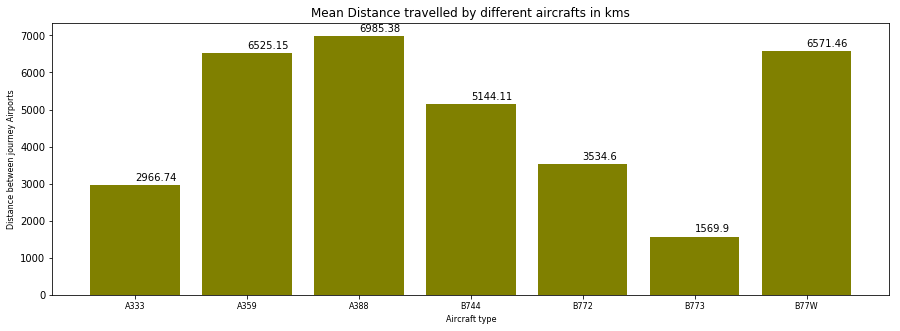

In [19]:
# We plot the mean distance travlled by the different aircrafts for all the different journey given in the dataset.
b = {'Aircraft_type': flight["Aircraft Type"], 'Travel_Distance': flight["Haversine_distance in kms"]}
flight_dist = pd.DataFrame(data=b)
flight_dist = flight_dist.groupby('Aircraft_type').mean()
flight_dist = flight_dist.reset_index()

plt.figure(figsize=(15, 5))
plt.bar(flight_dist["Aircraft_type"], flight_dist["Travel_Distance"], color='#808000')
plt.xlabel('Aircraft type', fontsize=8)
plt.ylabel('Distance between journey Airports', fontsize=8)
plt.xticks(range(7), flight_dist["Aircraft_type"], fontsize=8, rotation=0)
plt.title('Mean Distance travelled by different aircrafts in kms')
for i in range(0,len(flight_dist)):
    plt.text(flight_dist["Aircraft_type"][i],flight_dist["Travel_Distance"][i]+120,str(round(flight_dist["Travel_Distance"][i],2)))
plt.show()

<u><b><font size="5"><font color="#0000A0"><p style="font-family:Bodoni MT;"> Inference on Mean Distance travelled by different aircrafts in kms visualization</p></font></font></b></u>
<font size="3"><font color="#006400">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. Here we analyze the mean distance the different aircrafts are subjected to. This analysis indirectly suggests the type of aircraft used for the different load and flight journey distance.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. From the above graph we can conclude that the <b>Aircraft - A388 traverses the highest mean distance between various locations - 6985.38 km</b> in the given aircraft journey dataset.This also suggests that mostly for the passenger travel by aircraft, around the globe to travel long distances the Airline industry prefers to chose A388.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3. Followed by, the <b>B77W & A359 aircrafts traversed the mean distance of 6571.46 km and 6525.15 km</b>.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4. <b>A388, B77W & A359</b> aircrafts are the most normally used, for ling distance travel, while <b>B773, A333 & B772</b> are for short distance travel.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5. This kind of segregation between the long distance and short distance is the first step to have an optimized flight journey.</font></font>

Text(0.5, 1.0, 'Box-plot distribution of Origin location over Delta Blockage Out in minutes')

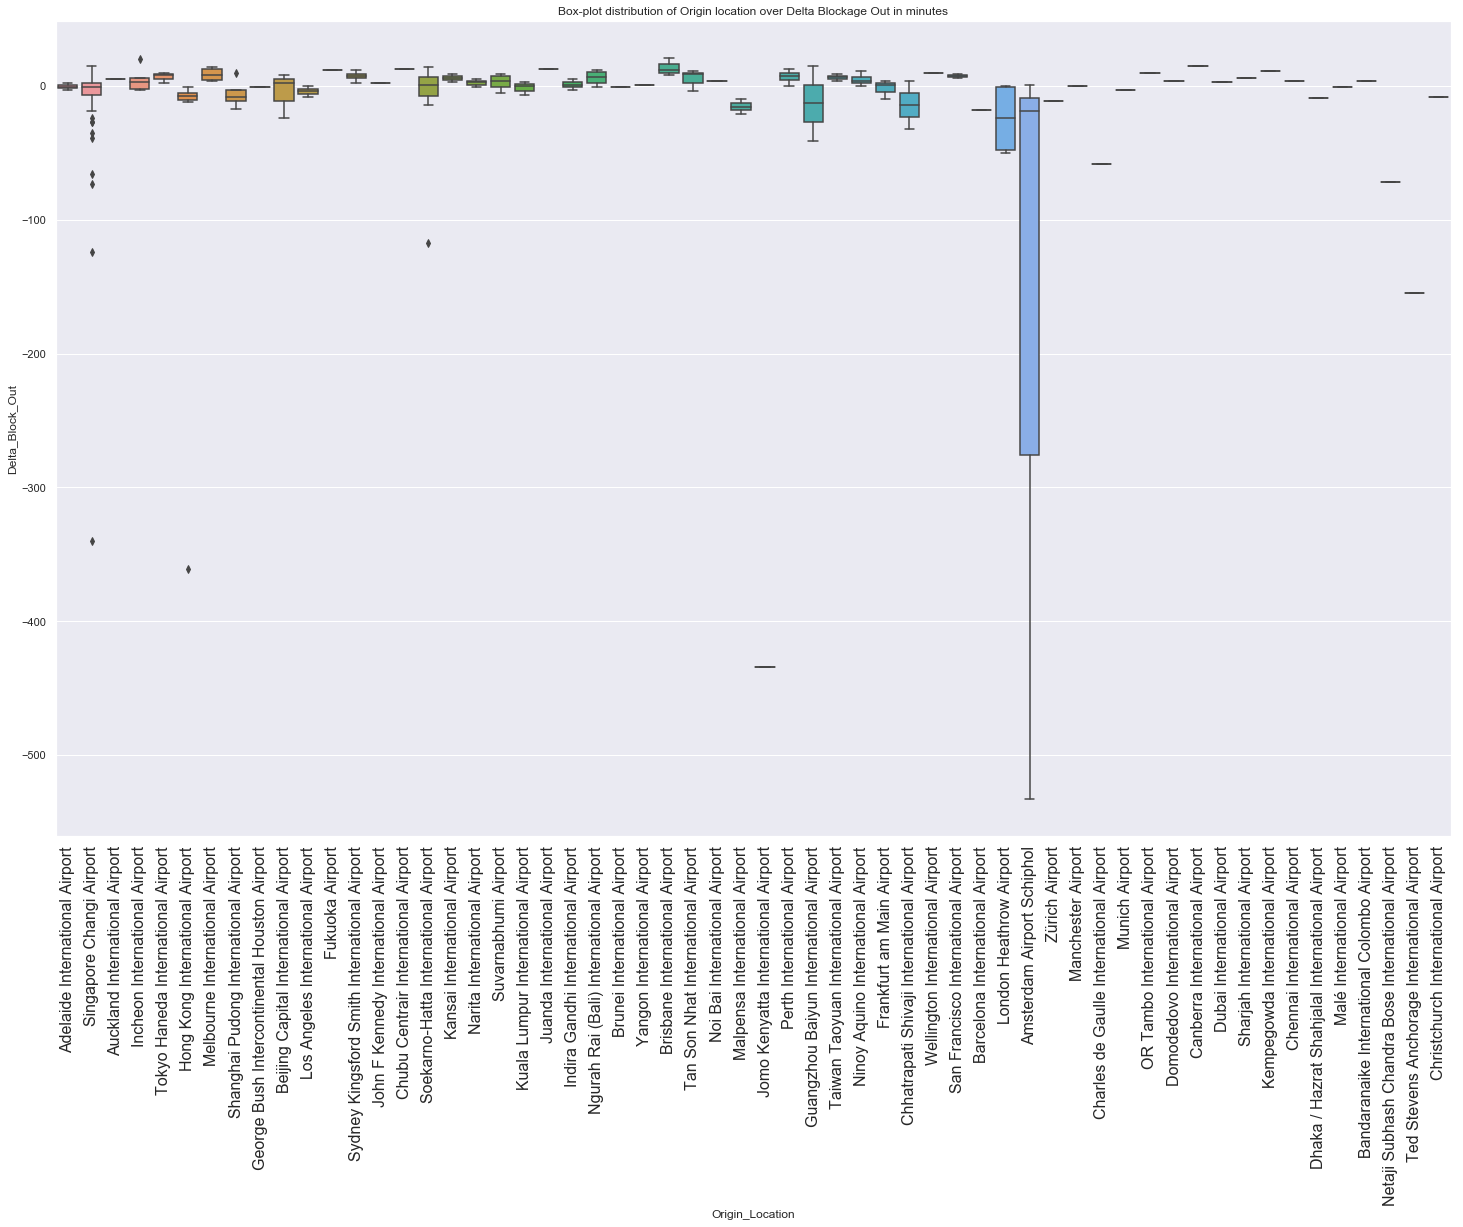

In [20]:
# We plot the box plot distribution of all the unique Origin Location for the Difference in the Block Out time
c = {'Origin_Location': flight["Origin_location"], 'Delta_Block_Out': flight["delta_Block_Out"]}
flight_b_out = pd.DataFrame(data=c)
flight_b_out = flight_b_out.reset_index()
flight_b_out = flight_b_out.drop(columns=["index"])

sns.set(rc={'figure.figsize':(25,15)})
sns.boxplot(x=flight_b_out["Origin_Location"], y=flight_b_out["Delta_Block_Out"], data=flight_b_out)
plt.xticks(fontsize=16,rotation=90) 
plt.title('Box-plot distribution of Origin location over Delta Blockage Out in minutes')

<u><b><font size="5"><font color="#0000A0"><p style="font-family:Bodoni MT;"> Inference on Box-plot distribution of Origin location over Delta Blockage Out in minutes visualization</p></font></font></b></u>
<font size="3"><font color="#006400">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. We have plotted the box plot distribution of the difference of Block Out time in minutes for the different unique Origin locations.We have got some interesting insights.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. The first inference would be that most of the European and Middle east countries (<b>Munich, Zurich, Sharjah etc,</b>), while certain Asian Countries (<b>Bengaluru, Chennai, Hong Kong</b>) have their difference between Scheduled and the Actual Block Out, very minimal and close to "0".<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3. The most interesting insight is the <b>Amsterdam Airport Schiphol</b> has the <b>highest Delta Block Out time</b>,ranging anywhere between <b>0 minutes  - 500 minutes ::> the reason owing to severe storm.</b>.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4. Following the Amsterdam Airport, we have the <b>London Hethrew Airport having highe blockout because of Severe Ice on the runway</b>, followed by <b>Guangzhou Baiyun International Airport, China, is the third most blocked airport owing to severe ice fall</b>.</font></font>

Text(0.5, 1.0, 'Box-plot distribution of Destination location over Delta Blockage In in minutes')

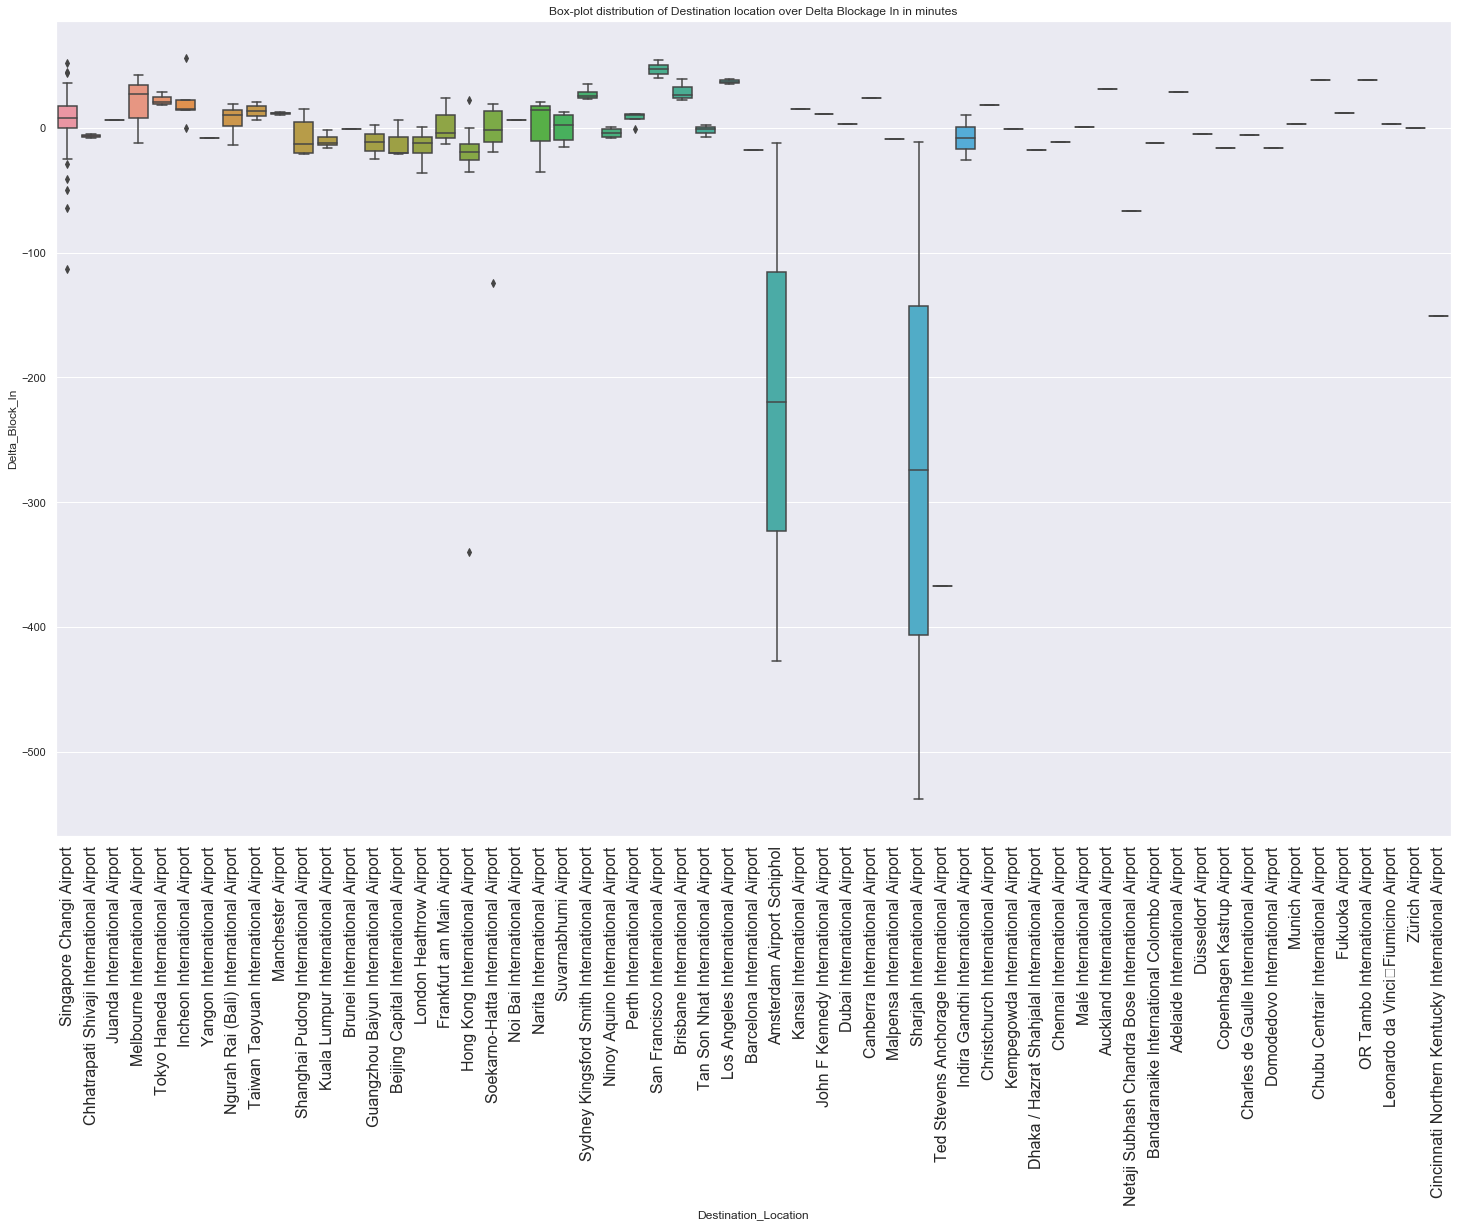

In [21]:
# We plot the box plot distribution of all the unique Destination Location for the Difference in the Block In time
d = {'Destination_Location': flight["Destination_location"], 'Delta_Block_In': flight["delta_Block_In"]}
flight_b_in = pd.DataFrame(data=d)
flight_b_in = flight_b_in.reset_index()
flight_b_in = flight_b_in.drop(columns=["index"])

sns.set(rc={'figure.figsize':(25,15)})
sns.boxplot(x=flight_b_in["Destination_Location"], y=flight_b_in["Delta_Block_In"], data=flight_b_in)
plt.xticks(fontsize=16,rotation=90)
plt.title('Box-plot distribution of Destination location over Delta Blockage In in minutes')

<u><b><font size="5"><font color="#0000A0"><p style="font-family:Bodoni MT;"> Inference on Box-plot distribution of Destination location over Delta Blockage In in minutes visualization</p></font></font></b></u>
<font size="3"><font color="#006400">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. We have plotted the box plot distribution of the difference of Block In time in minutes for the different unique Destination locations.We have got some interesting insights.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. The first inference would be that most of the Oceania and US's (<b>Auckland, JFK, Adelaide etc,</b>), while certain Asian Countries (<b>Bengaluru, Chennai, Hong Kong</b>) have their difference between Scheduled and the Actual Block In, very minimal and close to "0".<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3. The most interesting insight is the <b>Sharjah Airport Schiphol</b> has the <b>highest Delta Block In time</b>,ranging anywhere between <b>0 minutes  - 550 minutes ::> the reason owing to huge number of transit aircrafts in line.</b>.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4. Following Sharjah Airport, the second being the <b>Amsterdam Airport,because of Severe Ice on the runway, the flights coming in are not been able to land</b>, followed by <b>Narita International Airport, Tokyo, is the third most blocked airport owing to severe ice fall</b>.</font></font>

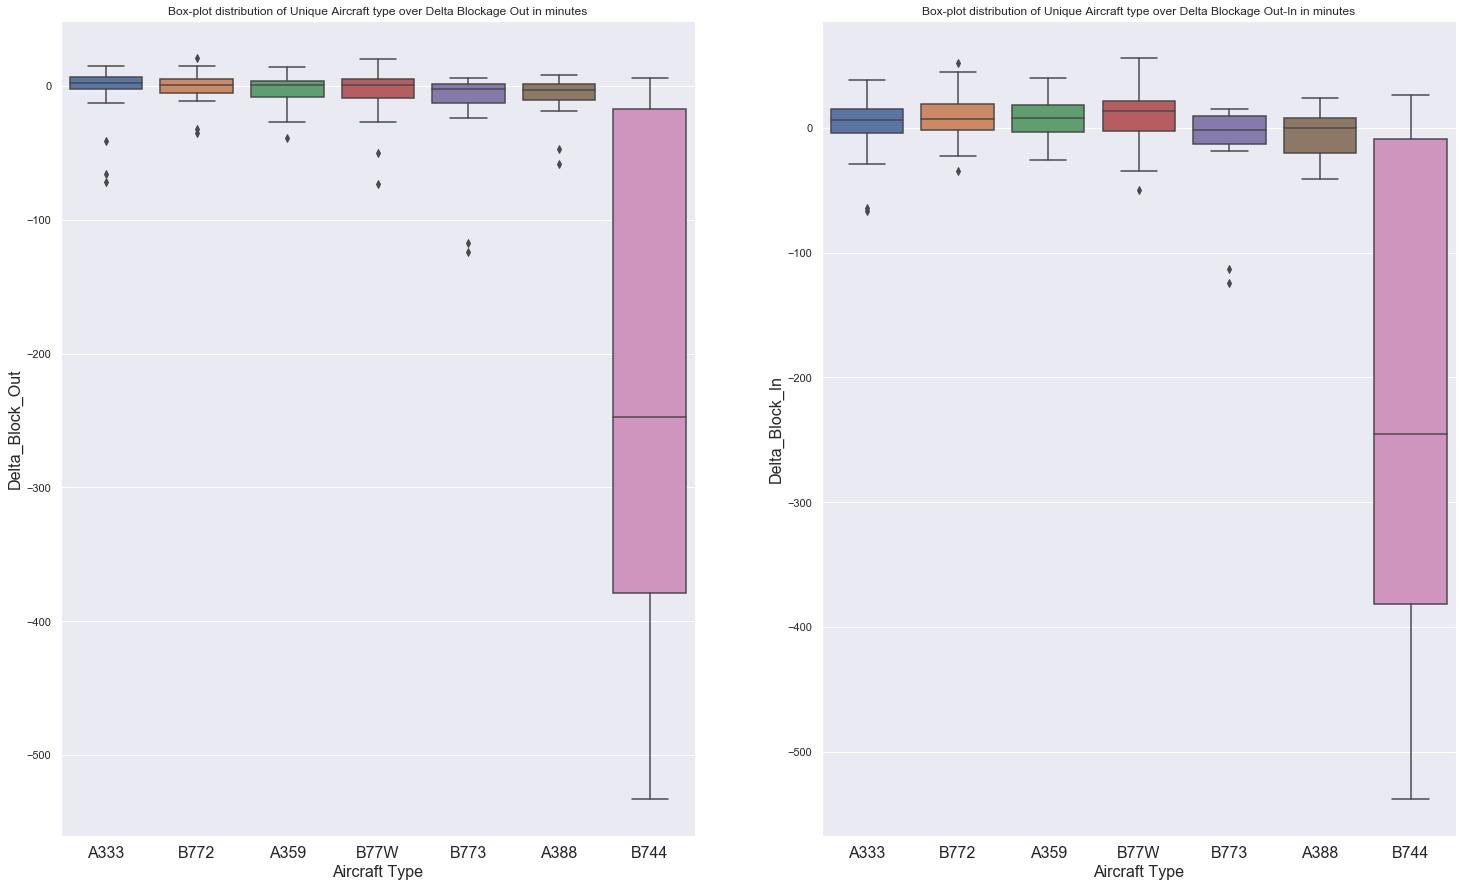

In [22]:
# We plot the comparison box plot distribution of all the unique Aircraft type for the Delta Block Out and Delta Block In
e = {'Aircraft_type': flight["Aircraft Type"], 'Delta_Block_Out': flight["delta_Block_Out"]}
flight_a_out = pd.DataFrame(data=e)
flight_a_out = flight_a_out.reset_index()

f = {'Aircraft_type': flight["Aircraft Type"], 'Delta_Block_In': flight["delta_Block_In"]}
flight_a_in = pd.DataFrame(data=f)
flight_a_in = flight_a_in.reset_index()

plt.subplot(1,2,1)
sns.set(rc={'figure.figsize':(25,15)})
sns.boxplot(x=flight_a_out["Aircraft_type"], y=flight_a_out["Delta_Block_Out"], data=flight_a_out)
plt.xlabel('Aircraft Type',fontsize=16)
plt.ylabel('Delta_Block_Out',fontsize=16)
plt.xticks(fontsize=16,rotation=0)
plt.title('Box-plot distribution of Unique Aircraft type over Delta Blockage Out in minutes')
plt.subplot(1,2,2)
sns.set(rc={'figure.figsize':(25,15)})
sns.boxplot(x=flight_a_in["Aircraft_type"], y=flight_a_in["Delta_Block_In"], data=flight_a_in)
plt.xlabel('Aircraft Type',fontsize=16)
plt.ylabel('Delta_Block_In',fontsize=16)
plt.xticks(fontsize=16,rotation=0)
plt.title('Box-plot distribution of Unique Aircraft type over Delta Blockage Out-In in minutes')
plt.show()

<u><b><font size="5"><font color="#0000A0"><p style="font-family:Bodoni MT;"> Inference on Box-plot distribution of Unique Aircraft type over Delta Blockage Out-In in minutes visualization</p></font></font></b></u>
<font size="3"><font color="#006400">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. Wrt to the Aircraft type that are plotted for the Delta Blockage In, we have the <b> Aircraft - B77W</b> having the highest Delta Block In, since as we know that the B77W aircraft is used for long distance heavy passenger load, many airports doesnt have the runway option nor the gate to load the aircraft, hence the huge delay.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. Wrt to the Aircraft type that are plotted for the Delta Blockage Out, we have the same <b> Aircraft - B77W</b> with the highest Delta Block Out, since as we know that the B77W aircraft is used for long distance heavy passenger load, it might take lot of time to check the vitals before take off anfd refuel time, would be more as well.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3. All the other aircraft type have their Delta Blockage In time more than the Delta Blockage Out time. </font></font>

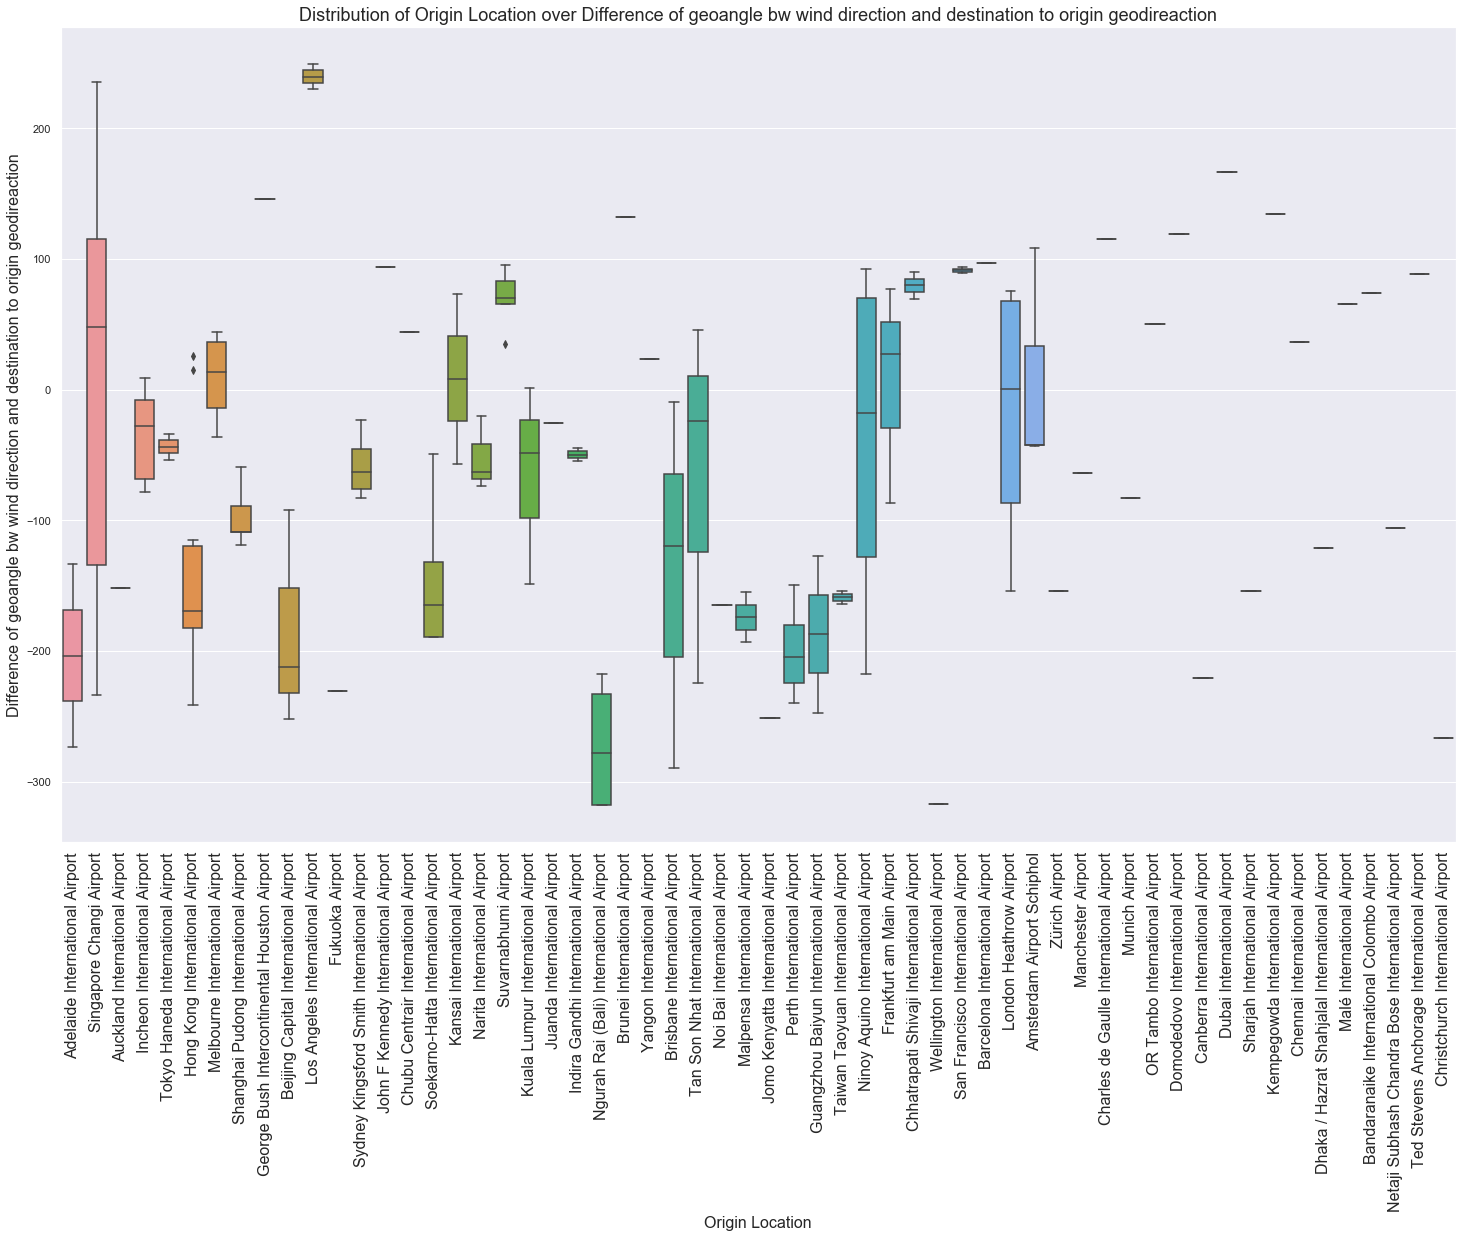

In [23]:
# We plot the boxplot distribution for the different Origin location for the difference of Origin-Destination angle with the wind direction
h = {'Origin_Location': flight["Origin_location"], 'Origin_Wind_Direction': flight["O_Wind Direction"],
     'Destination_Direction_to_Origin': flight["O-D_Dir"]}
flight_owind = pd.DataFrame(data=h)
flight_owind["Diff_Wind_Geodir_O"] = 0.00
flight_owind["Diff_Wind_Geodir_O"] = flight_owind["Origin_Wind_Direction"]-flight_owind["Destination_Direction_to_Origin"]

sns.set(rc={'figure.figsize':(25,15)})
sns.boxplot(x=flight_owind["Origin_Location"], y=flight_owind["Diff_Wind_Geodir_O"], data=flight_owind)
plt.xlabel('Origin Location',fontsize=16)
plt.ylabel('Difference of geoangle bw wind direction and destination to origin geodireaction',fontsize=16)
plt.xticks(fontsize=16,rotation=90)
plt.title('Distribution of Origin Location over Difference of geoangle bw wind direction and destination to origin geodireaction', fontsize=18)
plt.show()

<u><b><font size="5"><font color="#0000A0"><p style="font-family:Bodoni MT;"> Inference on Distribution of Origin Location over Difference of geoangle bw wind direction and destination to origin geodireaction visualization</p></font></font></b></u>
<font size="3"><font color="#006400">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. From the analysis, we see that there are many situations where the wind direction synchronizes with the aircraft travel angle. In that case the wind would aid the aircraft propulsion, makng it burn less fuel.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;> Singapore Changi Airport<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;> Incheon International Airport<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;> Tokyo Haneda International Airport<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;> Melbourne International Airport<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;> Kansai International Airport<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;> Ninoy Aquino International Airport<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;> Amsterdam International Airport<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. But there are places where the angle of attack on the flight is beyond a certain angle. The following are the most affected airports that have the drawback of wind flow.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;> Adelaide International Airport.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;> Auckland International Airport.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;> Hong Kong Airport.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;> Shanghai International Airport.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;> Beijing International Airport.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;> Fukuoka Airport.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;> Perth International Airport.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;> Guangzhou Baiyun International Airport<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;> Los Angeles International Airport<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;> Wellington International Airport<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;> Christchurch International Airport<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3. There are other European and Asian countries that had the drawback of wind direction, as it cna be seen from the above graph.</font></font>

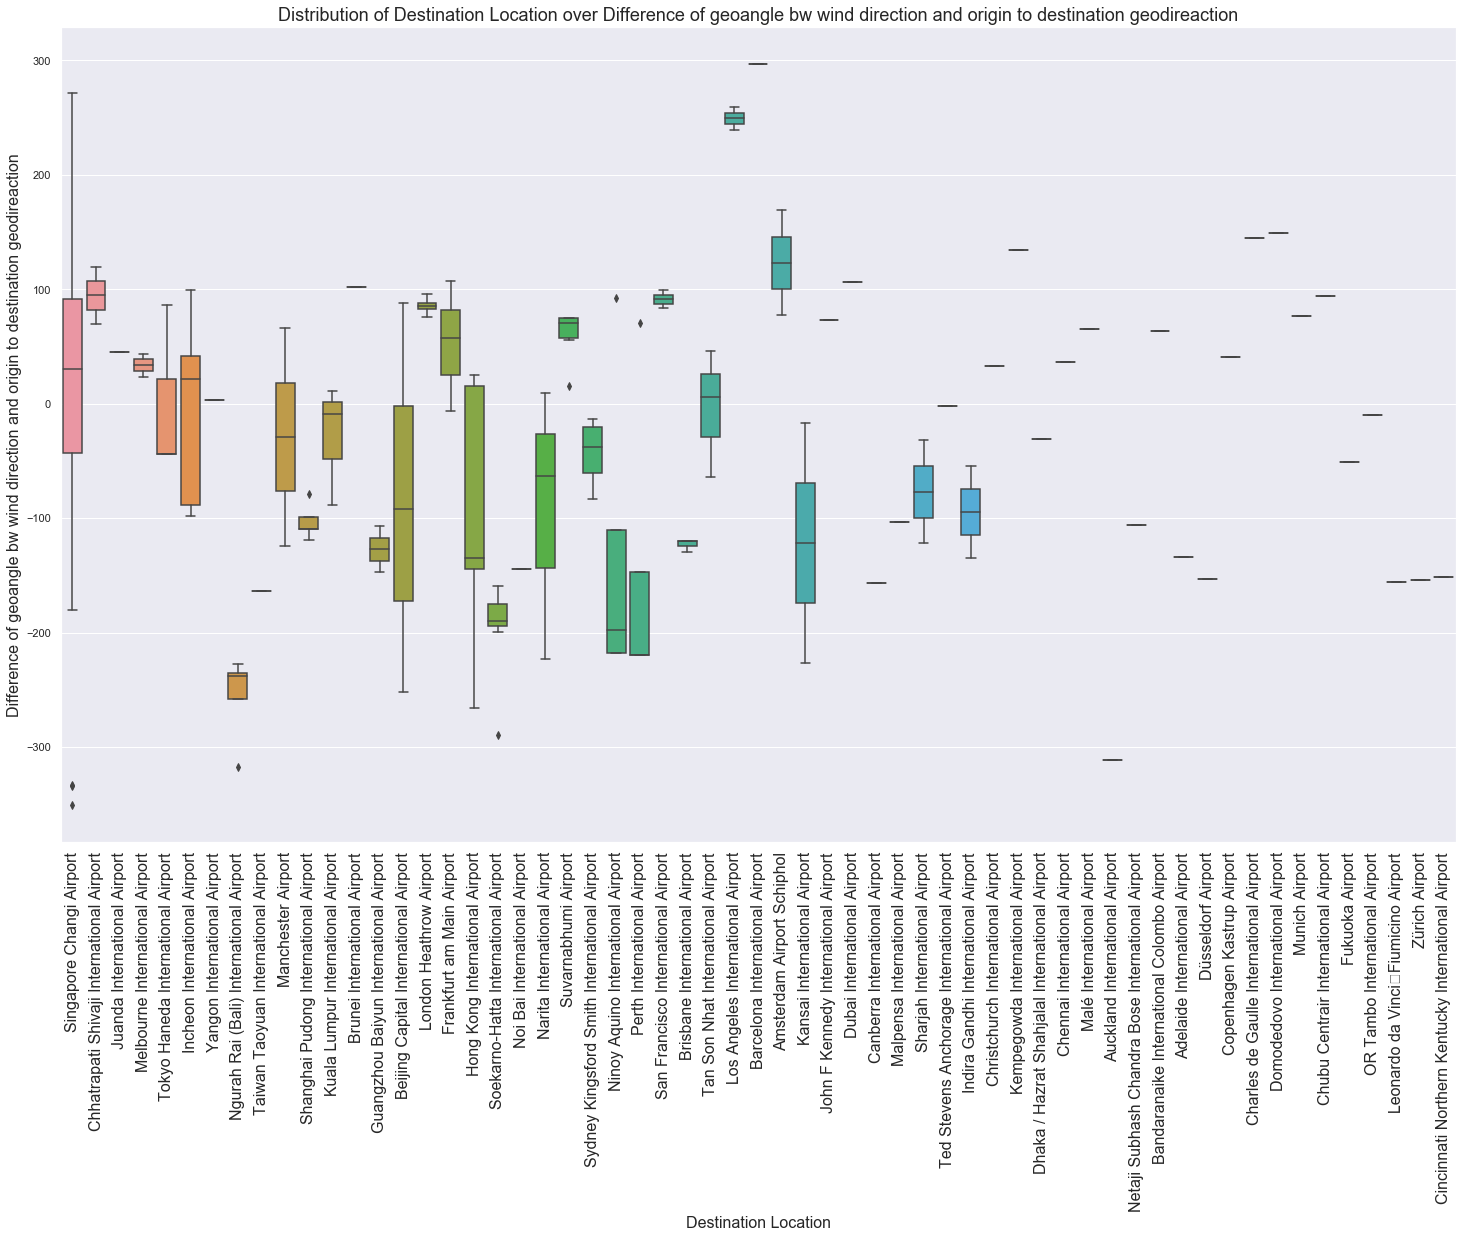

In [24]:
# We plot the boxplot distribution for the different Destination location for the difference of Destination-Origin angle with the wind direction
i = {'Destination_Location': flight["Destination_location"], 'Destination_Wind_Direction': flight["D_Wind Direction"],
     'Origin_Direction_to_Destination': flight["D-O_Dir"]}
flight_dwind = pd.DataFrame(data=i)
flight_dwind["Diff_Wind_Geodir_D"] = 0.00
flight_dwind["Diff_Wind_Geodir_D"] = flight_dwind["Destination_Wind_Direction"]-flight_dwind["Origin_Direction_to_Destination"]

sns.set(rc={'figure.figsize':(25,15)})
sns.boxplot(x=flight_dwind["Destination_Location"], y=flight_dwind["Diff_Wind_Geodir_D"], data=flight_dwind)
plt.xlabel('Destination Location',fontsize=16)
plt.ylabel('Difference of geoangle bw wind direction and origin to destination geodireaction',fontsize=16)
plt.xticks(fontsize=16,rotation=90)
plt.title('Distribution of Destination Location over Difference of geoangle bw wind direction and origin to destination geodireaction', fontsize=18)
plt.show()

<u><b><font size="5"><font color="#0000A0"><p style="font-family:Bodoni MT;"> Inference on Distribution of Destination Location over Difference of geoangle bw wind direction and origin to destination geodireaction visualization</p></font></font></b></u>
<font size="3"><font color="#006400">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. From the analysis, we see that there are many situations where the wind direction synchronizes with the aircraft travel angle. In that case the wind would aid the aircraft propulsion, makng it burn less fuel.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;> Singapore Changi Airport<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;> Incheon International Airport<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;> Tokyo Haneda International Airport<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;> Manchester Airport<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;> Tan Son Nhat International Airport<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;> Ted Stevens Anchorage International Airport<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;> OR Tambo International Airport<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. But there are places where the angle of attack on the flight is beyond a certain angle. The following are the most affected airports that have the drawback of wind flow.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;> Bali International Airport.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;> Los Angeles International Airport.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;> Soekarno–Hatta International Airport
<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;> Ninoy Aquino International Airport.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;> Perth International Airport.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;>  Auckland International Airport.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;>  Barcelona International Airport.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;>   Amsterdam International Airport<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;> Moscow Domodedovo Airport
 Airport<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3. There are other European and Asian countries that had the drawback of wind direction, as it cna be seen from the above graph.</font></font>

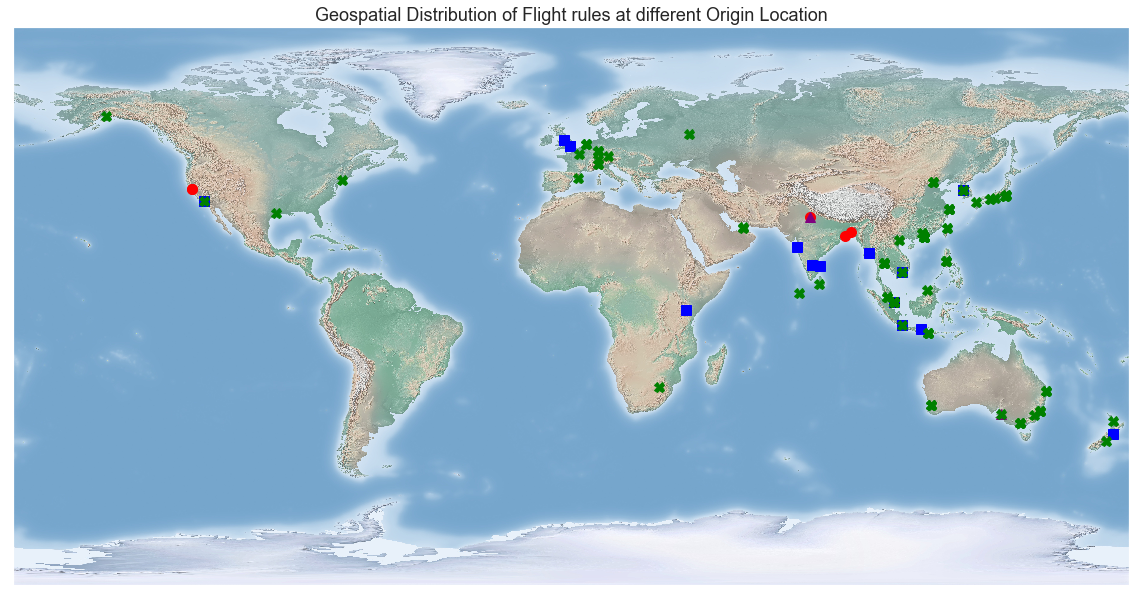

In [25]:
# We plot the 2D- Geospatial map distribution of flight rules over the Origin Location
j = {'Origin Location': flight["Origin_location"], 'Origin_flight_rules': flight["O_Flight Rules"],
     'Origin Latitude': flight["Origin_Latitude"], 'Origin Longitude': flight["Origin_Longitude"]}
flight_geo_rules_o = pd.DataFrame(data=j)

fig = plt.figure(figsize=(20,25), edgecolor='b')
mo = Basemap(projection='cyl', resolution='l',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180,)
mo.shadedrelief(scale=1);

ifr = flight_geo_rules_o.loc[flight_geo_rules_o["Origin_flight_rules"] == "IFR"]
lat1,lon1 = ifr["Origin Latitude"],ifr["Origin Longitude"]
x1,y1 = mo(lon1,lat1)
mo.plot(x1,y1,color='red',marker='o',markersize=10,linestyle='None')
lifr = flight_geo_rules_o.loc[flight_geo_rules_o["Origin_flight_rules"] == "LIFR"]
lat2,lon2 = lifr["Origin Latitude"],lifr["Origin Longitude"]
x2,y2 = mo(lon2,lat2)
mo.plot(x2,y2,color='purple',marker='^',markersize=10,linestyle='None')
mvfr = flight_geo_rules_o.loc[flight_geo_rules_o["Origin_flight_rules"] == "MVFR"]
lat3,lon3 = mvfr["Origin Latitude"],mvfr["Origin Longitude"]
x3,y3 = mo(lon3,lat3)
mo.plot(x3,y3,color='blue',marker='s',markersize=10,linestyle='None')
vfr = flight_geo_rules_o.loc[flight_geo_rules_o["Origin_flight_rules"] == "VFR"]
lat4,lon4 = vfr["Origin Latitude"],vfr["Origin Longitude"]
x4,y4 = mo(lon4,lat4)
mo.plot(x4,y4,color='green',marker='X',markersize=10,linestyle='None')
plt.title('Geospatial Distribution of Flight rules at different Origin Location', fontsize=18)
plt.show()

<u><b><font size="5"><font color="#0000A0"><p style="font-family:Bodoni MT;"> Inference on Distribution 2D- Geospatial map distribution of flight rules over the Origin Location visualization</p></font></font></b></u>
<font size="3"><font color="#006400">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. From the world map, we can see that most of the Asian countries airports are in the <b>VFR</b> category.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. Most of the European nations airports also have <b>VFR</b> category flight rules.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3. Most of the American nations airports also have <b>VFR</b> category flight rules.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4. <b>Delhi International Airport, San Fransisco International Airport & Dhaka Airport</b> have <b>IFR</b> flight rules, while <b>Indira Gandhi International Airport and Adelaide International Airport</b> have <b>LIFR flight rules</b>, while wuite of <b>Indian Aiports, Kenya Airport and London Airport</b> have <b>MIFR flight rules</b>.</font></font>

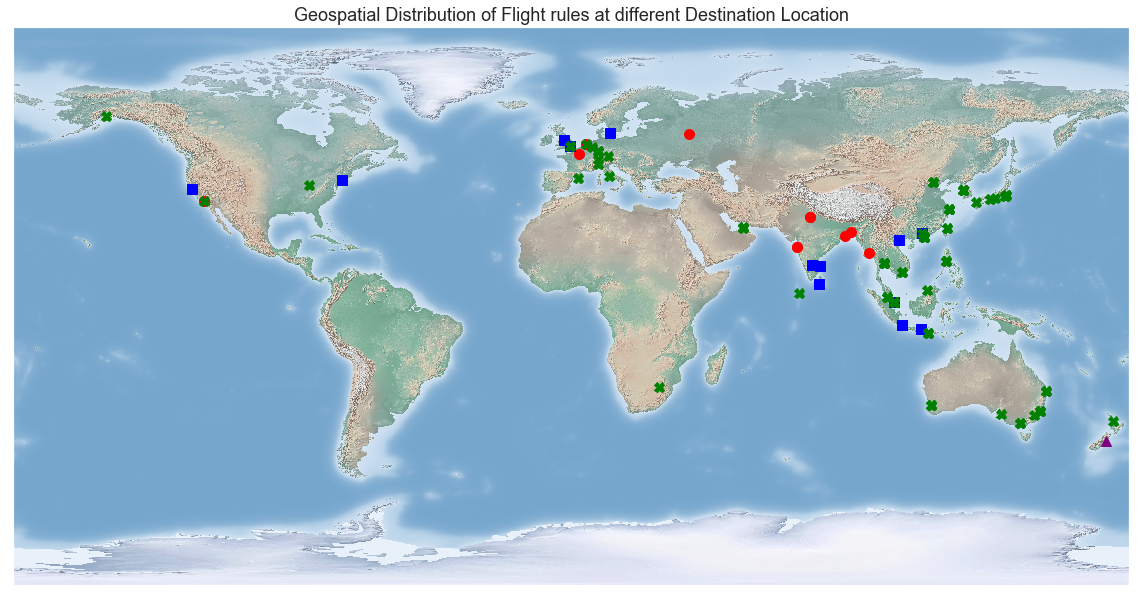

In [26]:
# We plot the 2D- Geospatial map distribution of flight rules over the Destination Location
k = {'Destination Location': flight["Destination_location"], 'Destination_flight_rules': flight["D_Flight Rules"],
     'Destination Latitude': flight["Destination_Latitude"], 'Destination Longitude': flight["Destination_Longitude"]}
flight_geo_rules_d = pd.DataFrame(data=k)

fig = plt.figure(figsize=(20,25), edgecolor='b')
md = Basemap(projection='cyl', resolution='l',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180,)
md.shadedrelief(scale=1);

ifr = flight_geo_rules_d.loc[flight_geo_rules_d["Destination_flight_rules"] == "IFR"]
lat1,lon1 = ifr["Destination Latitude"],ifr["Destination Longitude"]
x1,y1 = md(lon1,lat1)
md.plot(x1,y1,color='red',marker='o',markersize=10,linestyle='None')
lifr = flight_geo_rules_d.loc[flight_geo_rules_d["Destination_flight_rules"] == "LIFR"]
lat2,lon2 = lifr["Destination Latitude"],lifr["Destination Longitude"]
x2,y2 = md(lon2,lat2)
md.plot(x2,y2,color='purple',marker='^',markersize=10,linestyle='None')
mvfr = flight_geo_rules_d.loc[flight_geo_rules_d["Destination_flight_rules"] == "MVFR"]
lat3,lon3 = mvfr["Destination Latitude"],mvfr["Destination Longitude"]
x3,y3 = md(lon3,lat3)
md.plot(x3,y3,color='blue',marker='s',markersize=10,linestyle='None')
vfr = flight_geo_rules_d.loc[flight_geo_rules_d["Destination_flight_rules"] == "VFR"]
lat4,lon4 = vfr["Destination Latitude"],vfr["Destination Longitude"]
x4,y4 = md(lon4,lat4)
md.plot(x4,y4,color='green',marker='X',markersize=10,linestyle='None')
plt.title('Geospatial Distribution of Flight rules at different Destination Location', fontsize=18)
plt.show()

<u><b><font size="5"><font color="#0000A0"><p style="font-family:Bodoni MT;"> Inference on 2D- Geospatial map distribution of flight rules over the Destination Location visualization</p></font></font></b></u>
<font size="3"><font color="#006400">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. From the world map, we can see that most of the Oceania countries airports are in the <b>VFR</b> category.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. Most of the Indian nation airports have a cobination of <b>IFR and MIFR</b> category flight rules.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3. Most of the South-East Asian countries airports have <b>VFR</b> category flight rules.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4. Most of the European countries airports have a cobination of <b>VFR ,MIFR and IFR</b> category flight rules.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5. The entire American continent's airports have all <b>MIFR, IFR, MIFR and VFR</b> category flight rules.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6. the African continent has only <>VFR<> flight rules, while none of the eastern continents has <b>LIFR rules</b></font></font>

C:\Users\Lokesh Vairamuthu\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


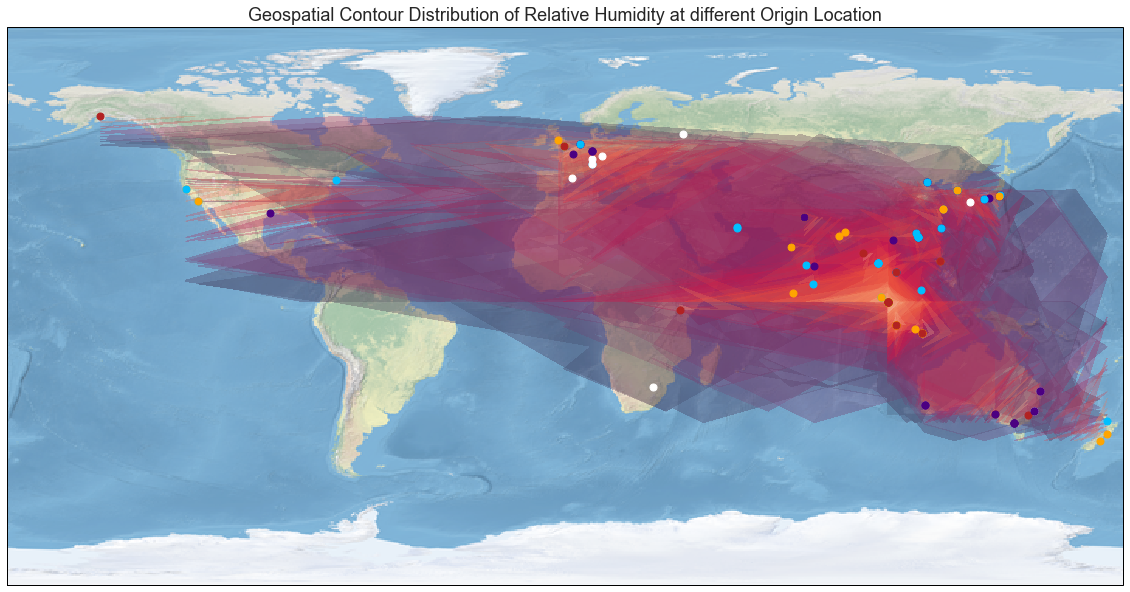

In [27]:
# We plot the 2D-Contour plot of the Relative Humidity over the different Origin Locations to get the most probable raining
#places to start the aircraft journey
k = {'Origin Latitude':flight["Origin_Latitude"], 'Origin Longitude':flight["Origin_Longitude"],
                   'Origin Relative Humidity':flight["O_Rel. Humidity (%)"]}
flight_relhum_o = pd.DataFrame(data=k)

lats = flight_relhum_o["Origin Latitude"][:]
lons = flight_relhum_o["Origin Longitude"][:]
pdd = pd.DataFrame(flight_relhum_o["Origin Relative Humidity"])
for i in range(0,len(lons)):
    pdd["Origin Relative Humidity_",+i] = 0
    
for i in range(0,len(pdd)):
    pdd["Origin Relative Humidity"][i] = pdd.columns[i]

pdd["index"] = pdd["Origin Relative Humidity"]
pdd["Origin Relative Humidity"] = 0
pdd = pdd.drop(columns={"index", "Origin Relative Humidity"})

nm = pd.DataFrame(flight_relhum_o["Origin Relative Humidity"])
dj = np.array(pdd)
for i in range(0,len(pdd)):
    np.fill_diagonal(dj,nm["Origin Relative Humidity"][i])
    
row,col = np.diag_indices(dj.shape[0])
dj[row,col] = np.array(flight_relhum_o["Origin Relative Humidity"])

plt.figure(figsize=(20,25))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.stock_img();

for i in range(0,len(lons)):
    if(flight_relhum_o["Origin Relative Humidity"][i] > 90):
        plt.plot(flight_relhum_o["Origin Longitude"][i], flight_relhum_o["Origin Latitude"][i],
                 color='#B22222', marker='o', transform=ccrs.Geodetic(), markersize=7)
    elif(flight_relhum_o["Origin Relative Humidity"][i] <= 90 and flight_relhum_o["Origin Relative Humidity"][i] > 80):
        plt.plot(flight_relhum_o["Origin Longitude"][i], flight_relhum_o["Origin Latitude"][i],
                 color='#FFA500', marker='o', transform=ccrs.Geodetic(), markersize=7)
    elif(flight_relhum_o["Origin Relative Humidity"][i] <= 80 and flight_relhum_o["Origin Relative Humidity"][i] > 70):
        plt.plot(flight_relhum_o["Origin Longitude"][i], flight_relhum_o["Origin Latitude"][i],
                 color='#00BFFF', marker='o', transform=ccrs.Geodetic(), markersize=7)
    elif(flight_relhum_o["Origin Relative Humidity"][i] <= 70 and flight_relhum_o["Origin Relative Humidity"][i] > 45):
        plt.plot(flight_relhum_o["Origin Longitude"][i], flight_relhum_o["Origin Latitude"][i],
                 color='#4B0082', marker='o', transform=ccrs.Geodetic(), markersize=7)
    else:
        plt.plot(flight_relhum_o["Origin Longitude"][i], flight_relhum_o["Origin Latitude"][i],
                 color='#FFFFFF', marker='o', transform=ccrs.Geodetic(), markersize=7)
    
plt.contourf(lons, lats, dj, transform=ccrs.PlateCarree(), alpha=0.15)
plt.title('Geospatial Contour Distribution of Relative Humidity at different Origin Location', fontsize=18)
plt.show()

<u><b><font size="5"><font color="#0000A0"><p style="font-family:Bodoni MT;"> Inference Geospatial Contour Distribution of Relative Humidity at different Origin Location visualization</p></font></font></b></u>
<font size="3"><font color="#006400">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. The above contour plot shows that the Singapore's Changi Airport has relatively highest relative humidity compared to the other countries.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. Most of the South_ East Asian countries are susceptible to have high relative humidity hence more chance of rain to occur that might hinder the optimized flight schedules by a huge number.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3. Most of the European countries are less susceptible to have high relative humidity hence less chance of rain to occur.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4. Almost all the American countries are more susceptible to have average relative humidity hence more chance of rain to occur is 50-50 that might hinder the optimized flight schedules.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5. Most of the airports in the Indian Subcontinent are moderately susceptible to have high relative humidity hence above average chance of rain to occur that might hinder the optimized flight schedules by a huge number.</font></font>

C:\Users\Lokesh Vairamuthu\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Lokesh Vairamuthu\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


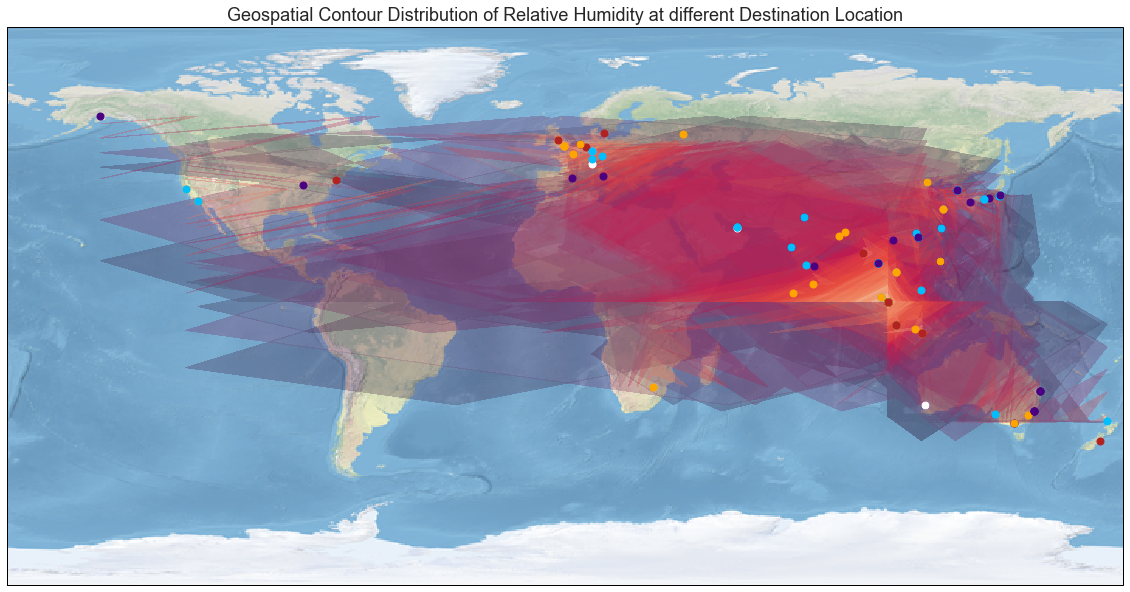

In [28]:
# We plot the 2D-Contour plot of the Relative Humidity over the different Destination Locations to get the most probable
#raining places to end the aircraft journey
l = {'Destination Latitude':flight["Destination_Latitude"], 'Destination Longitude':flight["Destination_Longitude"],
                   'Destination Relative Humidity':flight["D_Rel. Humidity (%)"]}
flight_relhum_d = pd.DataFrame(data=l)

lats_d = flight_relhum_d["Destination Latitude"][:]
lons_d = flight_relhum_d["Destination Longitude"][:]
pdd1 = pd.DataFrame(flight_relhum_d["Destination Relative Humidity"])
for i in range(0,len(lons_d)):
    pdd1["Destination Relative Humidity_",+i] = 0
    
for i in range(0,len(pdd1)):
    pdd1["Destination Relative Humidity"][i] = pdd1.columns[i]

pdd1["index"] = pdd1["Destination Relative Humidity"]
pdd1["Destination Relative Humidity"] = 0
pdd1 = pdd1.drop(columns={"index", "Destination Relative Humidity"})

nm1 = pd.DataFrame(flight_relhum_d["Destination Relative Humidity"])
dj1 = np.array(pdd1)
for i in range(0,len(pdd1)):
    np.fill_diagonal(dj1,nm1["Destination Relative Humidity"][i])
    
row,col = np.diag_indices(dj1.shape[0])
dj1[row,col] = np.array(flight_relhum_d["Destination Relative Humidity"])

plt.figure(figsize=(20,25))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.stock_img();

for i in range(0,len(lons_d)):
    if(flight_relhum_d["Destination Relative Humidity"][i] > 90):
        plt.plot(flight_relhum_d["Destination Longitude"][i], flight_relhum_d["Destination Latitude"][i],
                 color='#B22222', marker='o', transform=ccrs.Geodetic(), markersize=7)
    elif(flight_relhum_d["Destination Relative Humidity"][i] <= 90 and flight_relhum_d["Destination Relative Humidity"][i] > 80):
        plt.plot(flight_relhum_d["Destination Longitude"][i], flight_relhum_d["Destination Latitude"][i],
                 color='#FFA500', marker='o', transform=ccrs.Geodetic(), markersize=7)
    elif(flight_relhum_d["Destination Relative Humidity"][i] <= 80 and flight_relhum_d["Destination Relative Humidity"][i] > 70):
        plt.plot(flight_relhum_d["Destination Longitude"][i], flight_relhum_d["Destination Latitude"][i],
                 color='#00BFFF', marker='o', transform=ccrs.Geodetic(), markersize=7)
    elif(flight_relhum_d["Destination Relative Humidity"][i] <= 70 and flight_relhum_d["Destination Relative Humidity"][i] > 45):
        plt.plot(flight_relhum_d["Destination Longitude"][i], flight_relhum_d["Destination Latitude"][i],
                 color='#4B0082', marker='o', transform=ccrs.Geodetic(), markersize=7)
    else:
        plt.plot(flight_relhum_d["Destination Longitude"][i], flight_relhum_d["Destination Latitude"][i],
                 color='#FFFFFF', marker='o', transform=ccrs.Geodetic(), markersize=7)
    
plt.contourf(lons_d, lats_d, dj1, transform=ccrs.PlateCarree(), alpha=0.15)
plt.title('Geospatial Contour Distribution of Relative Humidity at different Destination Location', fontsize=18)
plt.show()

<u><b><font size="5"><font color="#0000A0"><p style="font-family:Bodoni MT;"> Inference Geospatial Contour Distribution of Relative Humidity at different Destination Location visualization</p></font></font></b></u>
<font size="3"><font color="#006400">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. Most of the Asian countries are above average susceptible to record high relative humdity, hence there is an aveage chance of rain to hinder the flight schedules at the Destination location.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. Singapore and Indonesia are the most strongly affected destiantion location to recieve high rain, that will affect the flight schedules.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3. London Airport and Amsterdam Airport are the most affected European countries that have high influence of rain towards the flight schedules.</font></font>

C:\Users\Lokesh Vairamuthu\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Lokesh Vairamuthu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Lokesh Vairamuthu\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Lokesh Vairamuthu\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: Set

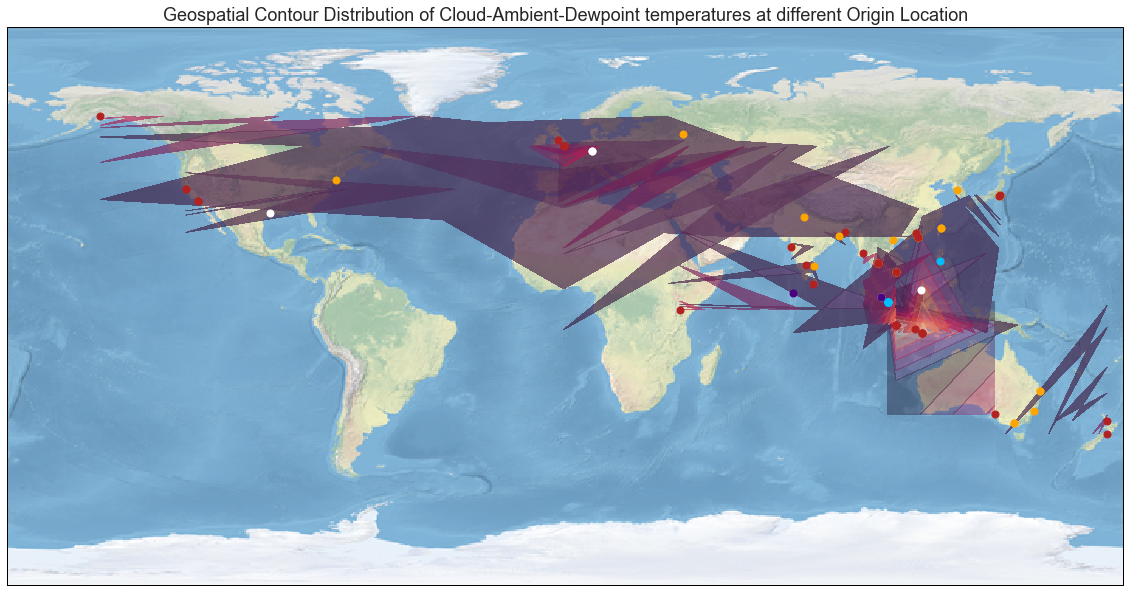

In [29]:
# We have plotted the 2D Contour plot for the combination of Cloud height with the ambient and dew point temperature to get the
#location that would mostly be affected by mist/fog at the Origin Location
cho = pd.cut(np.array(flight["O_Cloud Height (ft AGL)"]), 5, labels=[1, 10, 100, 1000, 10000])
cho = np.array(cho)
columns=['O_Cloud Height (ft AGL)_bin']
chpo = pd.DataFrame(cho.reshape(len(cho),1),columns=columns)
chpo["diff_dt"] = 0.00
chpo["final"] = 0.00
chpo["Origin Latitude"] = 0.00
chpo["Origin Longitude"] = 0.00
chpo["Origin Latitude"] = flight["Origin_Latitude"]
chpo["Origin Longitude"] = flight["Origin_Longitude"]
chpo["diff_dt"] = flight["O_Dew Point (C)"] - flight["O_Temp (C)"]
chpo = chpo[chpo['O_Cloud Height (ft AGL)_bin'].notnull()].reset_index().drop(columns={'index'})
for i in range(0,len(chpo)):
    chpo["final"][i] = 1 / (chpo["O_Cloud Height (ft AGL)_bin"][i]*(abs(chpo["diff_dt"][i])+1))
chpo_fin_min = chpo["final"].min()
for i in range(0,len(chpo)):
    chpo["final"][i] = chpo["final"][i] / chpo_fin_min

m = {'Origin Latitude':chpo["Origin Latitude"], 'Origin Longitude':chpo["Origin Longitude"],
                   'Origin Cld-Dew-Temp':chpo["final"]}
flight_clddewtemp_o = pd.DataFrame(data=m)

lat_cdt_o = flight_clddewtemp_o["Origin Latitude"][:]
lon_cdt_o = flight_clddewtemp_o["Origin Longitude"][:]
pd_cdt_o = pd.DataFrame(flight_clddewtemp_o["Origin Cld-Dew-Temp"])
for i in range(0,len(lon_cdt_o)):
    pd_cdt_o["Origin Cld-Dew-Temp_",+i] = 0
    
for i in range(0,len(pd_cdt_o)):
    pd_cdt_o["Origin Cld-Dew-Temp"][i] = pd_cdt_o.columns[i]

pd_cdt_o["index"] = pd_cdt_o["Origin Cld-Dew-Temp"]
pd_cdt_o["Origin Cld-Dew-Temp"] = 0
pd_cdt_o = pd_cdt_o.drop(columns={"index", "Origin Cld-Dew-Temp"})

xx = pd.DataFrame(flight_clddewtemp_o["Origin Cld-Dew-Temp"])
dt = np.array(pd_cdt_o)
for i in range(0,len(pd_cdt_o)):
    np.fill_diagonal(dt,xx["Origin Cld-Dew-Temp"][i])
    
row,col = np.diag_indices(dt.shape[0])
dt[row,col] = np.array(flight_clddewtemp_o["Origin Cld-Dew-Temp"])

plt.figure(figsize=(20,25))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.stock_img();

for i in range(0,len(lon_cdt_o)):
    if(flight_clddewtemp_o["Origin Cld-Dew-Temp"][i] > 21666.66):
        plt.plot(flight_clddewtemp_o["Origin Longitude"][i], flight_clddewtemp_o["Origin Latitude"][i],
                 color='#B22222', marker='o', transform=ccrs.Geodetic(), markersize=7)
    elif(flight_clddewtemp_o["Origin Cld-Dew-Temp"][i] <= 21666.66 and flight_clddewtemp_o["Origin Cld-Dew-Temp"][i] > 1300):
        plt.plot(flight_clddewtemp_o["Origin Longitude"][i], flight_clddewtemp_o["Origin Latitude"][i],
                 color='#FFA500', marker='o', transform=ccrs.Geodetic(), markersize=7)
    elif(flight_clddewtemp_o["Origin Cld-Dew-Temp"][i] <= 1300 and flight_clddewtemp_o["Origin Cld-Dew-Temp"][i] > 4.33):
        plt.plot(flight_clddewtemp_o["Origin Longitude"][i], flight_clddewtemp_o["Origin Latitude"][i],
                 color='#00BFFF', marker='o', transform=ccrs.Geodetic(), markersize=7)
    elif(flight_clddewtemp_o["Origin Cld-Dew-Temp"][i] <= 4.33 and flight_clddewtemp_o["Origin Cld-Dew-Temp"][i] > 2.60):
        plt.plot(flight_clddewtemp_o["Origin Longitude"][i], flight_clddewtemp_o["Origin Latitude"][i],
                 color='#4B0082', marker='o', transform=ccrs.Geodetic(), markersize=7)
    else:
        plt.plot(flight_clddewtemp_o["Origin Longitude"][i], flight_clddewtemp_o["Origin Latitude"][i],
                 color='#FFFFFF', marker='o', transform=ccrs.Geodetic(), markersize=7)

plt.contourf(lon_cdt_o, lat_cdt_o, dt, transform=ccrs.PlateCarree(), alpha=0.4)
plt.title('Geospatial Contour Distribution of Cloud-Ambient-Dewpoint temperatures at different Origin Location', fontsize=18)
plt.show()

<u><b><font size="5"><font color="#0000A0"><p style="font-family:Bodoni MT;"> Inference Geospatial Contour Distribution of Cloud-Ambient-Dewpoint temperatures at different Origin Location visualization</p></font></font></b></u>
<font size="3"><font color="#006400">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. In most of the Origin locations that are described, teh flight schedules have an immense effect by the cloud height- Ambient and Dew point temperatures.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. Most of the Indian airports, Indonesia Airports, Japan, China, Kenya, Los Angeles, San Fransisco, All of European airports are very heavily influenxed by the fog and mist resulting from the cloud height-dew point-ambient temperature analysis.</font></font>

C:\Users\Lokesh Vairamuthu\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Lokesh Vairamuthu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Lokesh Vairamuthu\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Lokesh Vairamuthu\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: Set

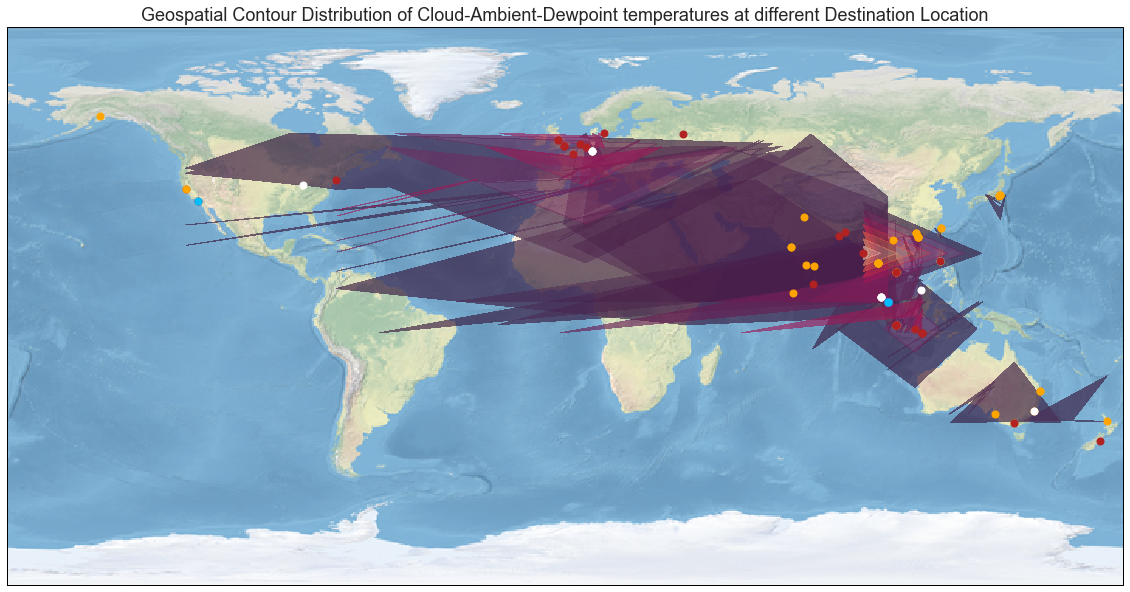

In [30]:
# We have plotted the 2D Contour plot for the combination of Cloud height with the ambient and dew point temperature to get the
#location that would mostly be affected by mist/fog at the Destination Location
chd = pd.cut(np.array(flight["D_Cloud Height (ft AGL)"]), 5, labels=[1, 10, 100, 1000, 10000])
chd = np.array(chd)
columns=['D_Cloud Height (ft AGL)_bin']
chpd = pd.DataFrame(chd.reshape(len(chd),1),columns=columns)
chpd["diff_dtd"] = 0.00
chpd["finald"] = 0.00
chpd["Destination Latitude"] = 0.00
chpd["Destination Longitude"] = 0.00
chpd["Destination Latitude"] = flight["Destination_Latitude"]
chpd["Destination Longitude"] = flight["Destination_Longitude"]
chpd["diff_dtd"] = flight["D_Dew Point (C)"] - flight["D_Temp (C)"]
chpd = chpd[chpd['D_Cloud Height (ft AGL)_bin'].notnull()].reset_index().drop(columns={'index'})
for i in range(0,len(chpd)):
    chpd["finald"][i] = 1 / (chpd["D_Cloud Height (ft AGL)_bin"][i]*(abs(chpd["diff_dtd"][i])+1))
chpd_fin_min = chpd["finald"].min()
for i in range(0,len(chpd)):
    chpd["finald"][i] = chpd["finald"][i] / chpd_fin_min

n = {'Destination Latitude':chpd["Destination Latitude"], 'Destination Longitude':chpd["Destination Longitude"],
                   'Destination Cld-Dew-Temp':chpd["finald"]}
flight_clddewtemp_d = pd.DataFrame(data=n)

lat_cdt_d = flight_clddewtemp_d["Destination Latitude"][:]
lon_cdt_d = flight_clddewtemp_d["Destination Longitude"][:]
pd_cdt_d = pd.DataFrame(flight_clddewtemp_d["Destination Cld-Dew-Temp"])
for i in range(0,len(lon_cdt_d)):
    pd_cdt_d["Destination Cld-Dew-Temp_",+i] = 0
    
for i in range(0,len(pd_cdt_d)):
    pd_cdt_d["Destination Cld-Dew-Temp"][i] = pd_cdt_d.columns[i]

pd_cdt_d["index"] = pd_cdt_d["Destination Cld-Dew-Temp"]
pd_cdt_d["Destination Cld-Dew-Temp"] = 0
pd_cdt_d = pd_cdt_d.drop(columns={"index", "Destination Cld-Dew-Temp"})

xxd = pd.DataFrame(flight_clddewtemp_d["Destination Cld-Dew-Temp"])
dtd = np.array(pd_cdt_d)
for i in range(0,len(pd_cdt_d)):
    np.fill_diagonal(dtd,xxd["Destination Cld-Dew-Temp"][i])
    
row,col = np.diag_indices(dtd.shape[0])
dtd[row,col] = np.array(flight_clddewtemp_d["Destination Cld-Dew-Temp"])

plt.figure(figsize=(20,25))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.stock_img();

for i in range(0,len(lon_cdt_d)):
    if(flight_clddewtemp_d["Destination Cld-Dew-Temp"][i] > 48000.00):
        plt.plot(flight_clddewtemp_d["Destination Longitude"][i], flight_clddewtemp_d["Destination Latitude"][i],
                 color='#B22222', marker='o', transform=ccrs.Geodetic(), markersize=7)
    elif(flight_clddewtemp_d["Destination Cld-Dew-Temp"][i] <= 48000.00 and flight_clddewtemp_d["Destination Cld-Dew-Temp"][i] > 2857.14):
        plt.plot(flight_clddewtemp_d["Destination Longitude"][i], flight_clddewtemp_d["Destination Latitude"][i],
                 color='#FFA500', marker='o', transform=ccrs.Geodetic(), markersize=7)
    elif(flight_clddewtemp_d["Destination Cld-Dew-Temp"][i] <= 2857.14 and flight_clddewtemp_d["Destination Cld-Dew-Temp"][i] > 5.00):
        plt.plot(flight_clddewtemp_d["Destination Longitude"][i], flight_clddewtemp_d["Destination Latitude"][i],
                 color='#00BFFF', marker='o', transform=ccrs.Geodetic(), markersize=7)
    elif(flight_clddewtemp_d["Destination Cld-Dew-Temp"][i] <= 5.00 and flight_clddewtemp_d["Destination Cld-Dew-Temp"][i] > 4.00):
        plt.plot(flight_clddewtemp_d["Destination Longitude"][i], flight_clddewtemp_d["Destination Latitude"][i],
                 color='#4B0082', marker='o', transform=ccrs.Geodetic(), markersize=7)
    else:
        plt.plot(flight_clddewtemp_d["Destination Longitude"][i], flight_clddewtemp_d["Destination Latitude"][i],
                 color='#FFFFFF', marker='o', transform=ccrs.Geodetic(), markersize=7)

plt.contourf(lon_cdt_d, lat_cdt_d, dtd, transform=ccrs.PlateCarree(), alpha=0.4)
plt.title('Geospatial Contour Distribution of Cloud-Ambient-Dewpoint temperatures at different Destination Location', fontsize=18)
plt.show()

<u><b><font size="5"><font color="#0000A0"><p style="font-family:Bodoni MT;"> Inference Geospatial Contour Distribution of Cloud-Ambient-Dewpoint temperatures at different Destination Location visualization</p></font></font></b></u>
<font size="3"><font color="#006400">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. In most of the Destination locations in Asia and Europe, the flight schedules have an immense effect by the cloud height- Ambient and Dew point temperatures.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. All of the Indian airports, Indonesia Airports, Japan, China, All of European airports are very heavily influenzed by the fog and mist resulting from the effect of cloud height-dew point-ambient temperature analysis.</font></font>

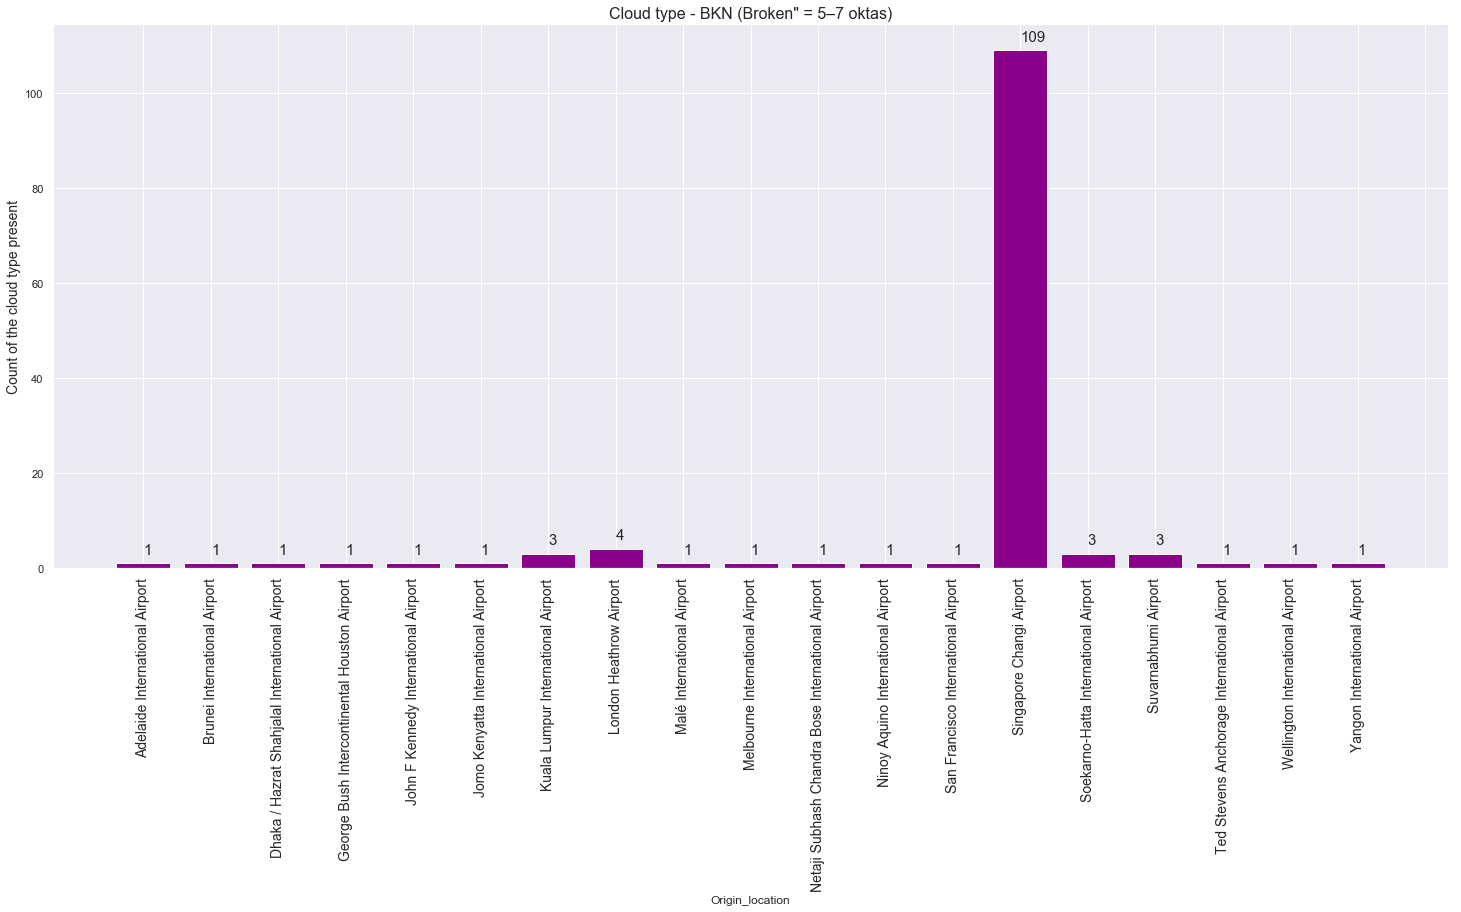

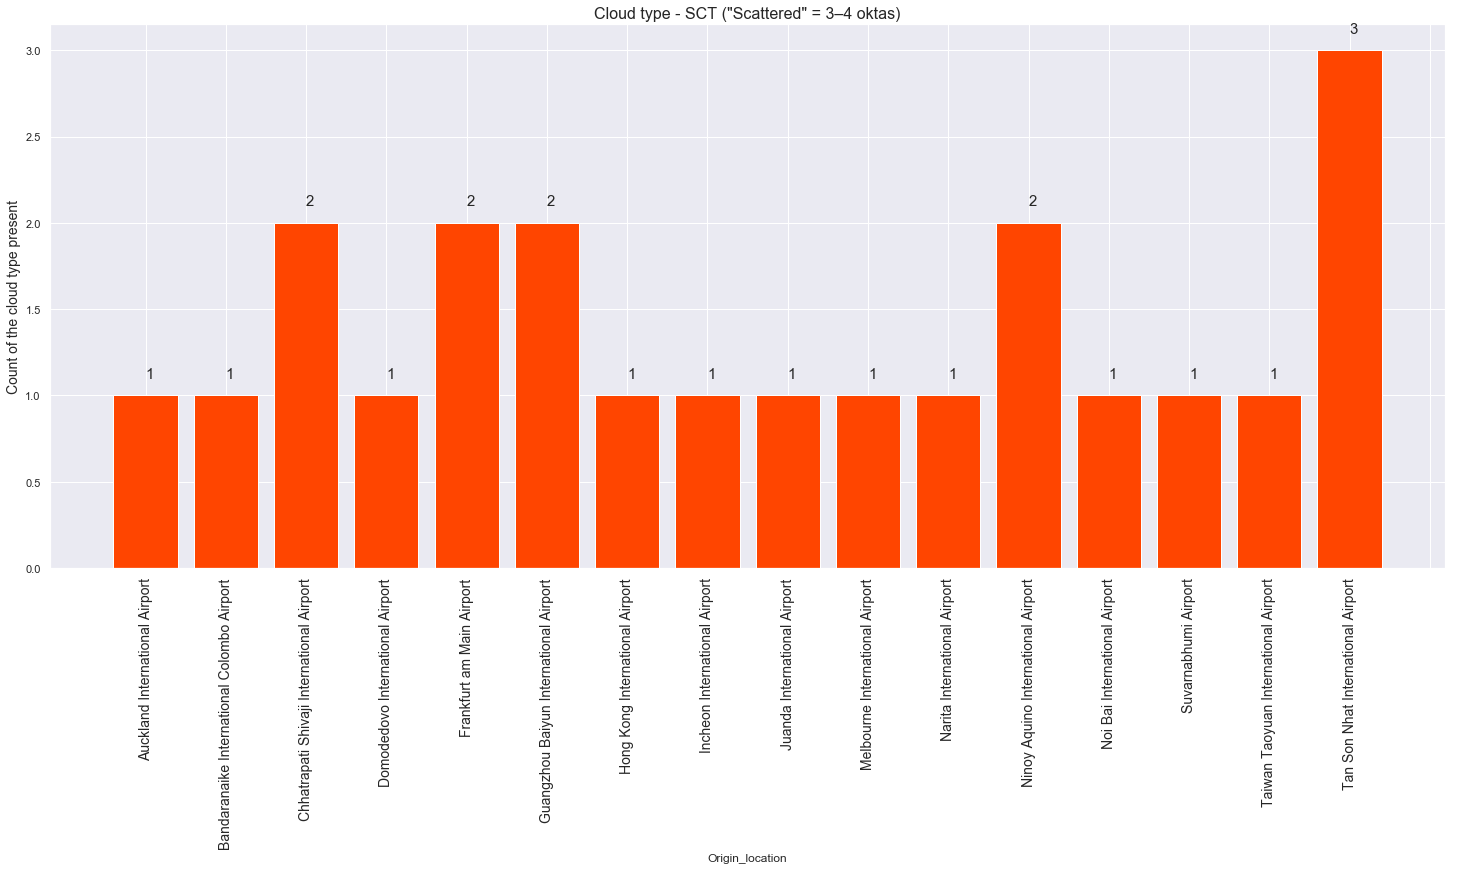

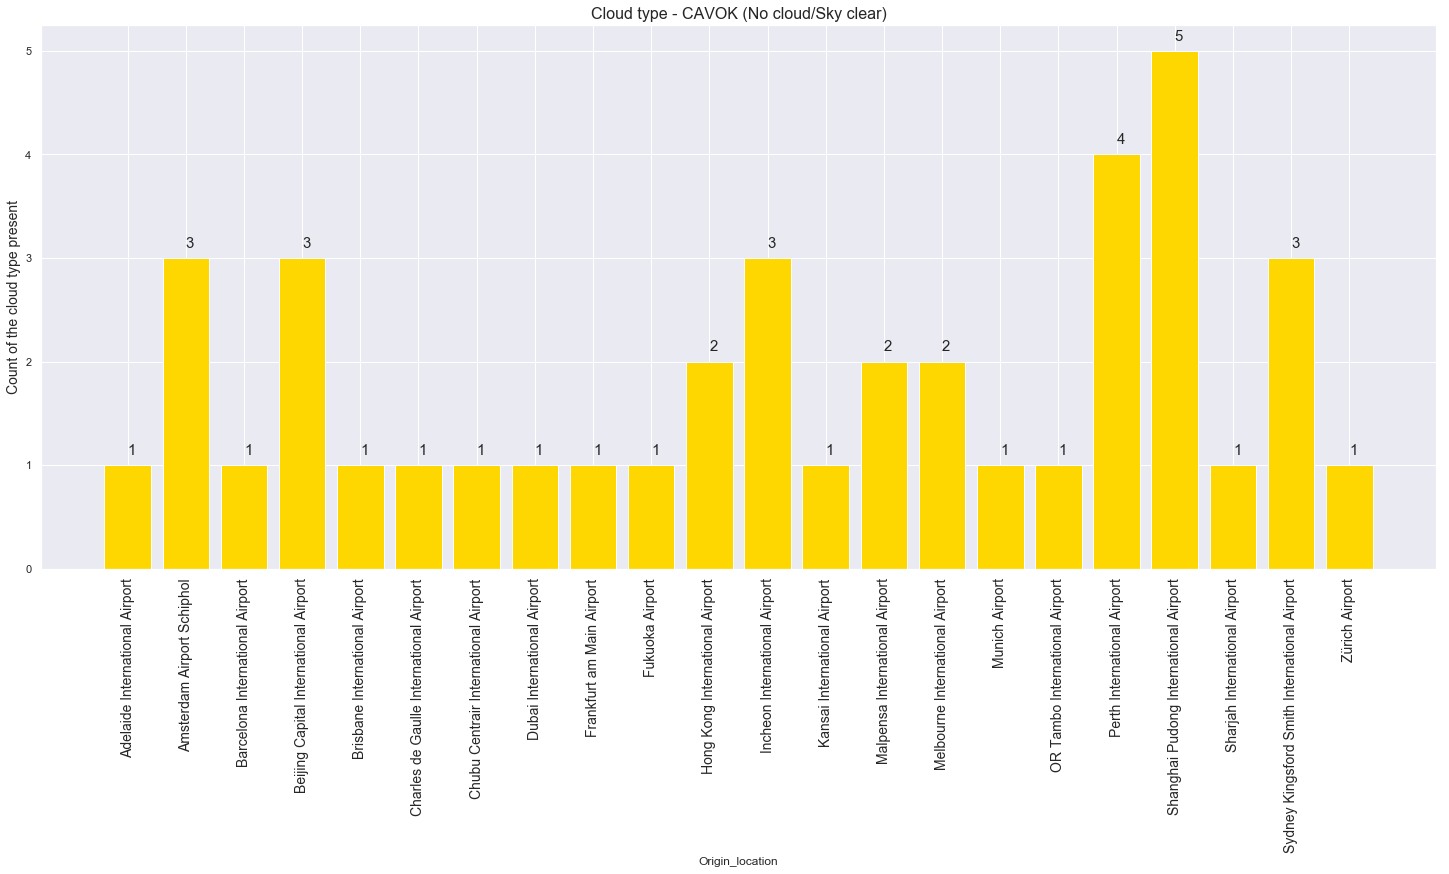

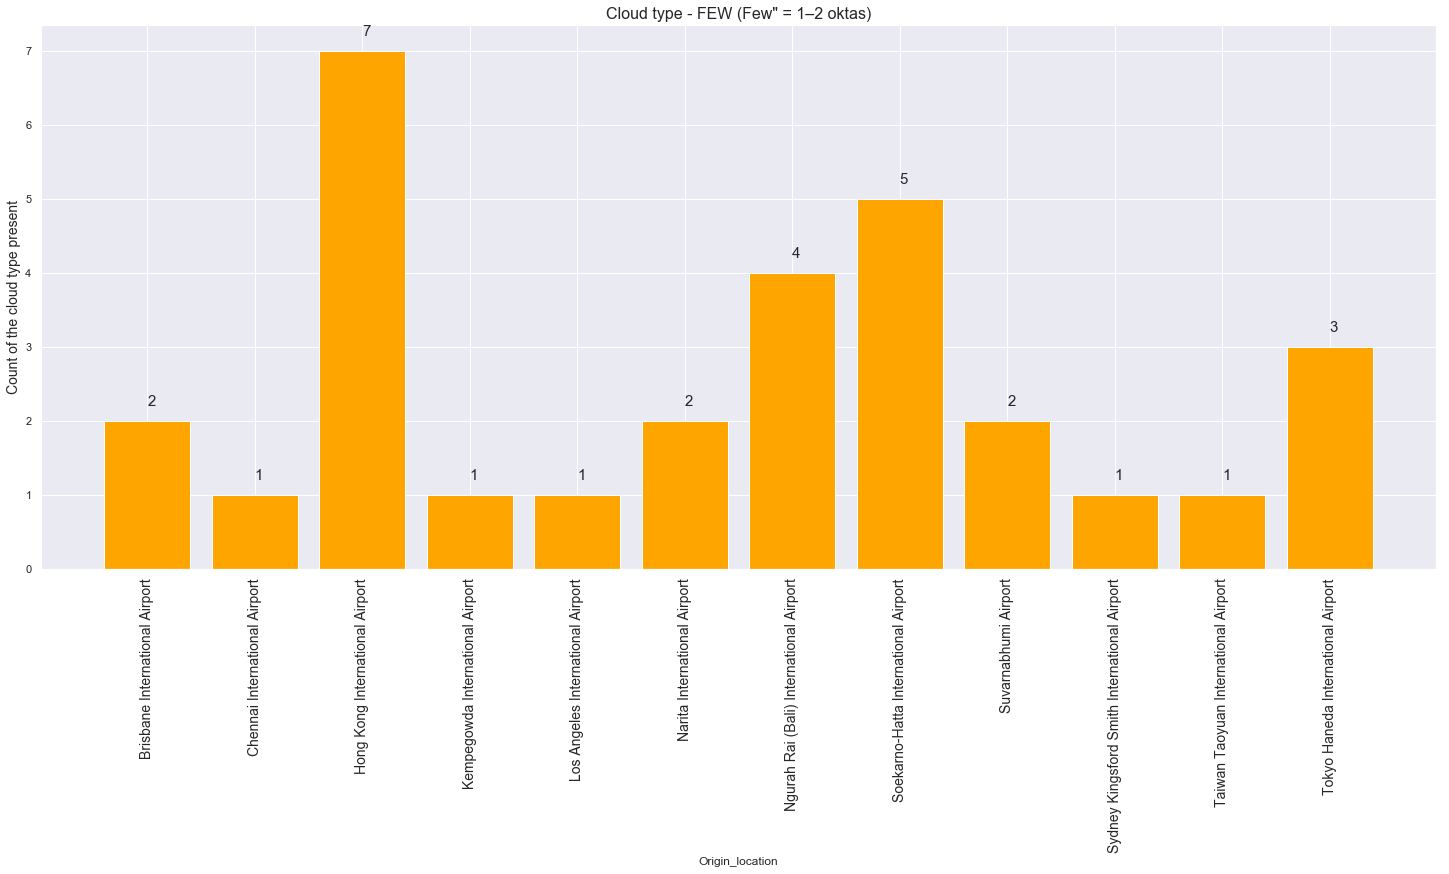

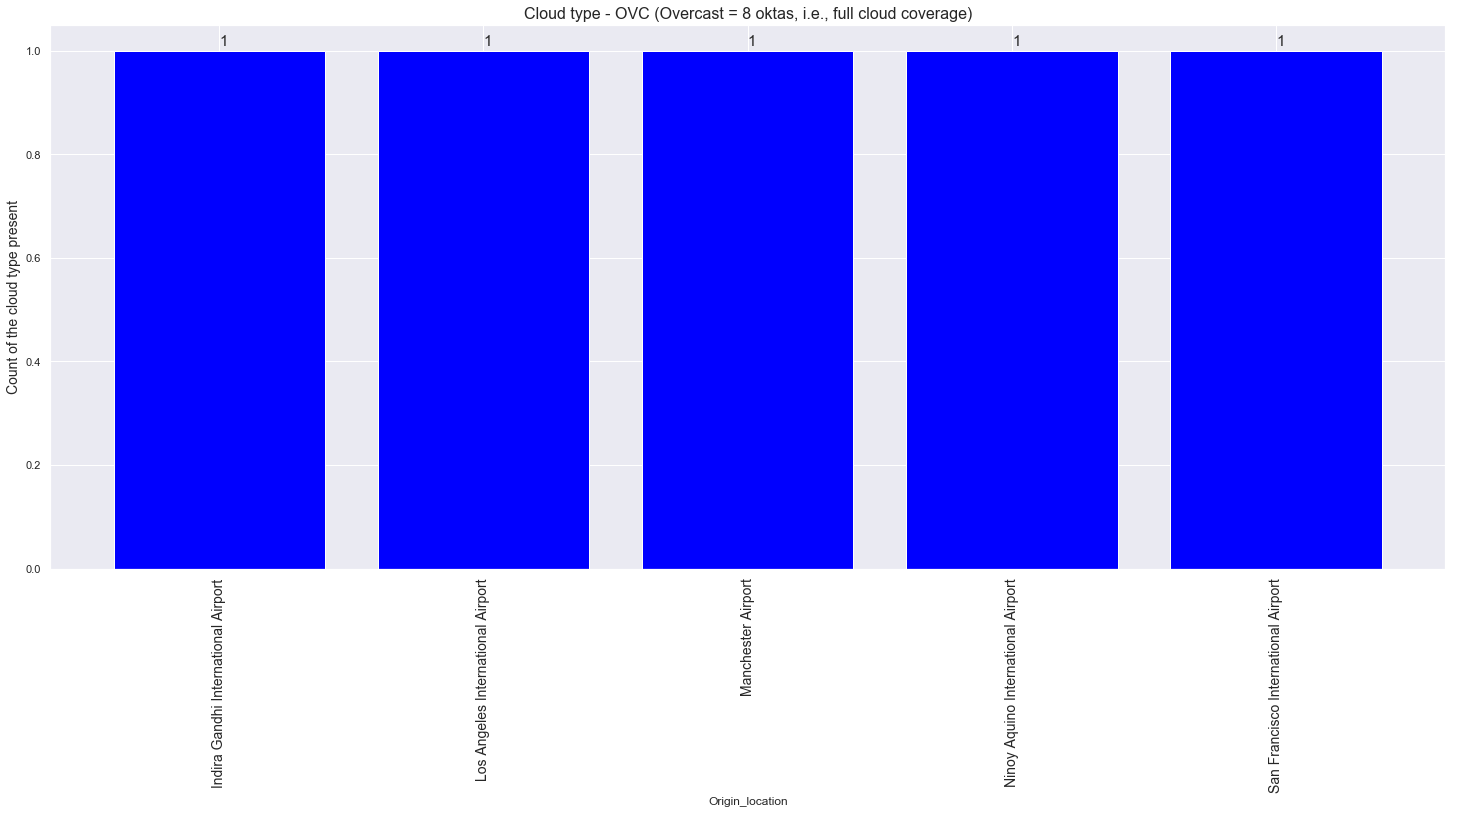

In [31]:
# We have plotted the comparitive bar plot analysis of each cloud type over the Origin Locations
flight_o_ct = pd.DataFrame(flight["Origin_location"])
flight_o_ct["Origin Cloud Type"] = "0.00"
flight_o_ct["Origin Cloud Type"] = flight["O_Cloud Type"]
flight_o_ct = flight_o_ct[flight_o_ct['Origin Cloud Type'].notnull()]
flight_o_ct["Cnt_Cloudtype"] = 1
flight_o_ct = flight_o_ct.groupby(['Origin_location','Origin Cloud Type']).agg({'Cnt_Cloudtype': 'sum'}).reset_index()

foct1 = flight_o_ct[flight_o_ct["Origin Cloud Type"] == "BKN"].reset_index()
foct2 = flight_o_ct[flight_o_ct["Origin Cloud Type"] == "SCT"].reset_index()
foct3 = flight_o_ct[flight_o_ct["Origin Cloud Type"] == "CAVOK"].reset_index()
foct4 = flight_o_ct[flight_o_ct["Origin Cloud Type"] == "FEW"].reset_index()
foct5 = flight_o_ct[flight_o_ct["Origin Cloud Type"] == "OVC"].reset_index()

plt.figure(figsize=(25, 10))
plt.bar(foct1["Origin_location"], foct1["Cnt_Cloudtype"], color='#8B008B')
plt.xlabel('Origin_location', fontsize=12)
plt.ylabel('Count of the cloud type present', fontsize=14)
plt.xticks(range(20), foct1["Origin_location"], fontsize=14, rotation=90)
plt.title('Cloud type - BKN (Broken" = 5–7 oktas)', fontsize=16)
for i in range(0,len(foct1)):
    plt.text(foct1["Origin_location"][i], foct1["Cnt_Cloudtype"][i]+2, str(foct1["Cnt_Cloudtype"][i]), fontsize=15)
plt.show()

plt.figure(figsize=(25, 10))
plt.bar(foct2["Origin_location"], foct2["Cnt_Cloudtype"], color='#FF4500')
plt.xlabel('Origin_location', fontsize=12)
plt.ylabel('Count of the cloud type present', fontsize=14)
plt.xticks(range(17), foct2["Origin_location"], fontsize=14, rotation=90)
plt.title('Cloud type - SCT ("Scattered" = 3–4 oktas)', fontsize=16)
for i in range(0,len(foct2)):
    plt.text(foct2["Origin_location"][i], foct2["Cnt_Cloudtype"][i]+0.1, str(foct2["Cnt_Cloudtype"][i]), fontsize=15)
plt.show()

plt.figure(figsize=(25, 10))
plt.bar(foct3["Origin_location"], foct3["Cnt_Cloudtype"], color='#FFD700')
plt.xlabel('Origin_location', fontsize=12)
plt.ylabel('Count of the cloud type present', fontsize=14)
plt.xticks(range(22), foct3["Origin_location"], fontsize=14, rotation=90)
plt.title('Cloud type - CAVOK (No cloud/Sky clear)', fontsize=16)
for i in range(0,len(foct3)):
    plt.text(foct3["Origin_location"][i], foct3["Cnt_Cloudtype"][i]+0.1, str(foct3["Cnt_Cloudtype"][i]), fontsize=15)
plt.show()

plt.figure(figsize=(25, 10))
plt.bar(foct4["Origin_location"], foct4["Cnt_Cloudtype"], color='#FFA500')
plt.xlabel('Origin_location', fontsize=12)
plt.ylabel('Count of the cloud type present', fontsize=14)
plt.xticks(range(12), foct4["Origin_location"], fontsize=14, rotation=90)
plt.title('Cloud type - FEW (Few" = 1–2 oktas)', fontsize=16)
for i in range(0,len(foct4)):
    plt.text(foct4["Origin_location"][i], foct4["Cnt_Cloudtype"][i]+0.2, str(foct4["Cnt_Cloudtype"][i]), fontsize=15)
plt.show()

plt.figure(figsize=(25, 10))
plt.bar(foct5["Origin_location"], foct5["Cnt_Cloudtype"], color='#0000FF')
plt.xlabel('Origin_location', fontsize=12)
plt.ylabel('Count of the cloud type present', fontsize=14)
plt.xticks(range(5), foct5["Origin_location"], fontsize=14, rotation=90)
plt.title('Cloud type - OVC (Overcast = 8 oktas, i.e., full cloud coverage)', fontsize=16)
for i in range(0,len(foct5)):
    plt.text(foct5["Origin_location"][i], foct5["Cnt_Cloudtype"][i]+0.01, str(foct5["Cnt_Cloudtype"][i]), fontsize=15)
plt.show()

<u><b><font size="5"><font color="#0000A0"><p style="font-family:Bodoni MT;"> Inference comparitive bar plot analysis of each cloud type over the Origin Locations visualization</p></font></font></b></u>
<font size="3"><font color="#006400">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. For the cloud type <b>BKN (broken), Singapore Changi Airport (109) & the London Heathrew Airport (4)</b>, occupies the first and the second position of the having the BKN type of cloud around the analysis period.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. For the cloud type <b>SCT (scattered), Tan Son Nhat International Airport (3) & the Mumbai International Airport, Frankfurt International Airport, Guangzhou Baiyun International Airport and the Ninoy Aquino International Airport (2)</b>, occupies the first and the second position of the having the SCT type of cloud around the analysis period.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3. For the cloud type <b>CAVOK (Clear), Shanghai International Airport (5) & the Perth International Airport (2)</b>, occupies the first and the second position of the having the CAVOK type of cloud around the analysis period, the others are seen in the above analysis<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4. For the cloud type <b>FEW (FEW), Hong Kong International Airport (7) & the Soekarno–Hatta International Airport (5)</b>, occupies the first and the second position of the having the FEW type of cloud around the analysis period.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5. For the cloud type <b>OVC (Overcast), Delhi International Airport, Manchester International Airport, Los Angeles International Airport, Ninoy Aquino International Airport and San Fransisco International Airport</b>, all occupies the first position of the having the OVC type of cloud around the analysis period. </font></font>

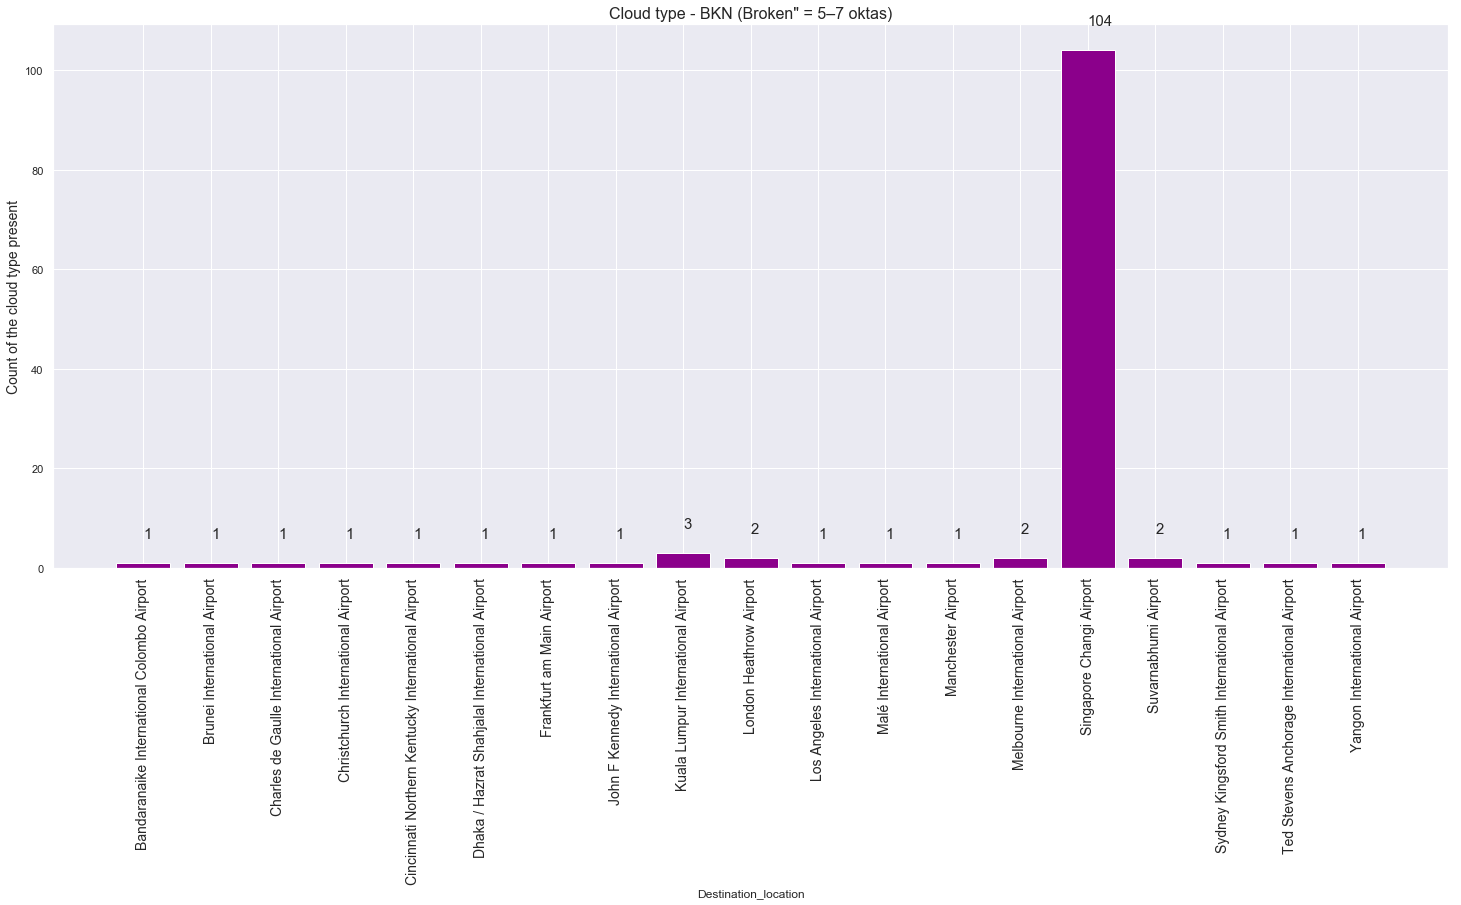

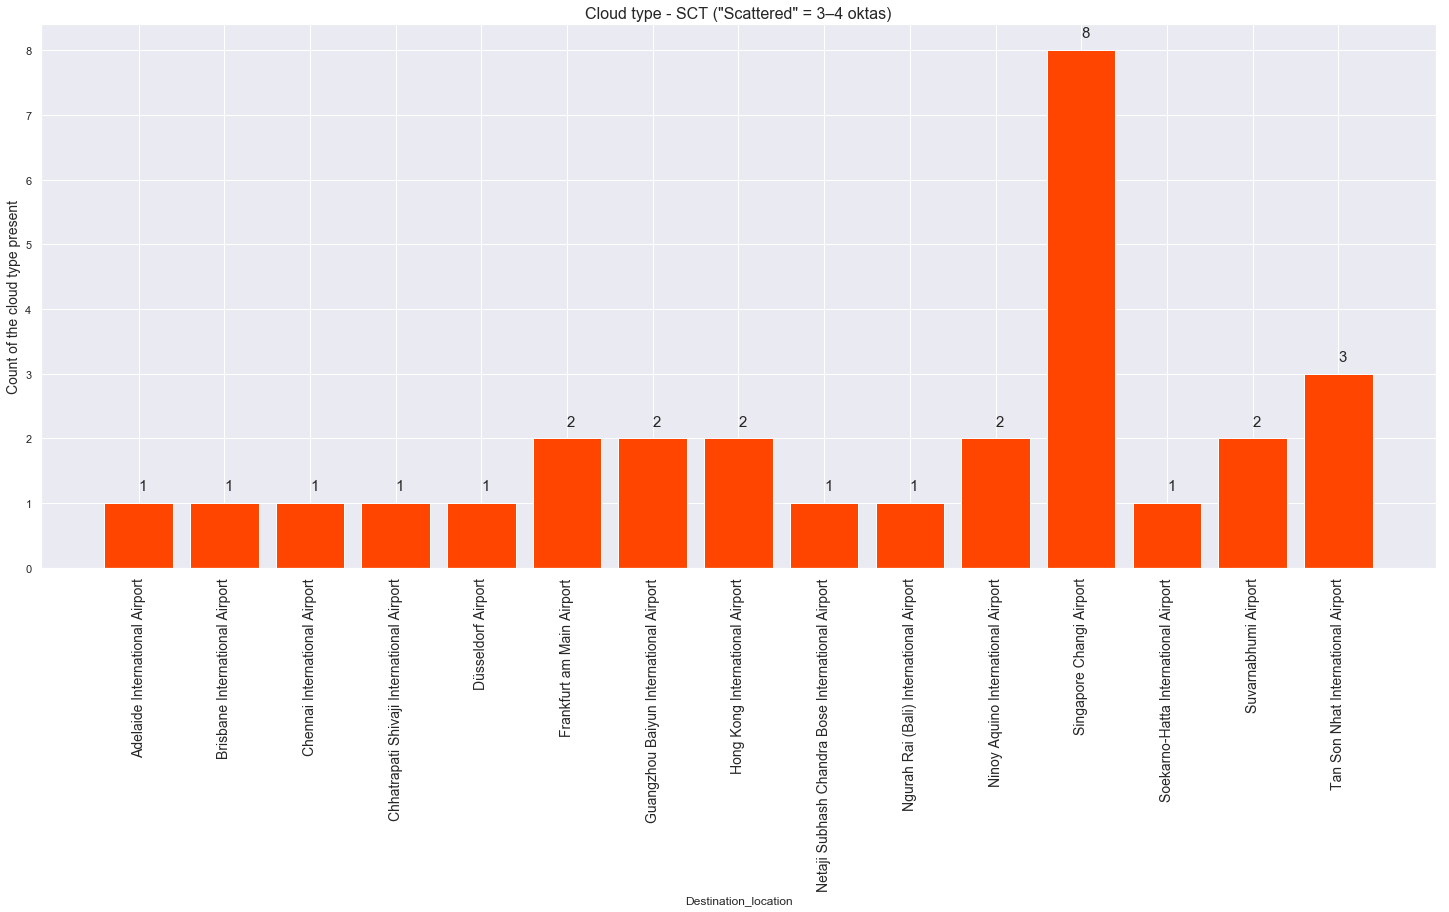

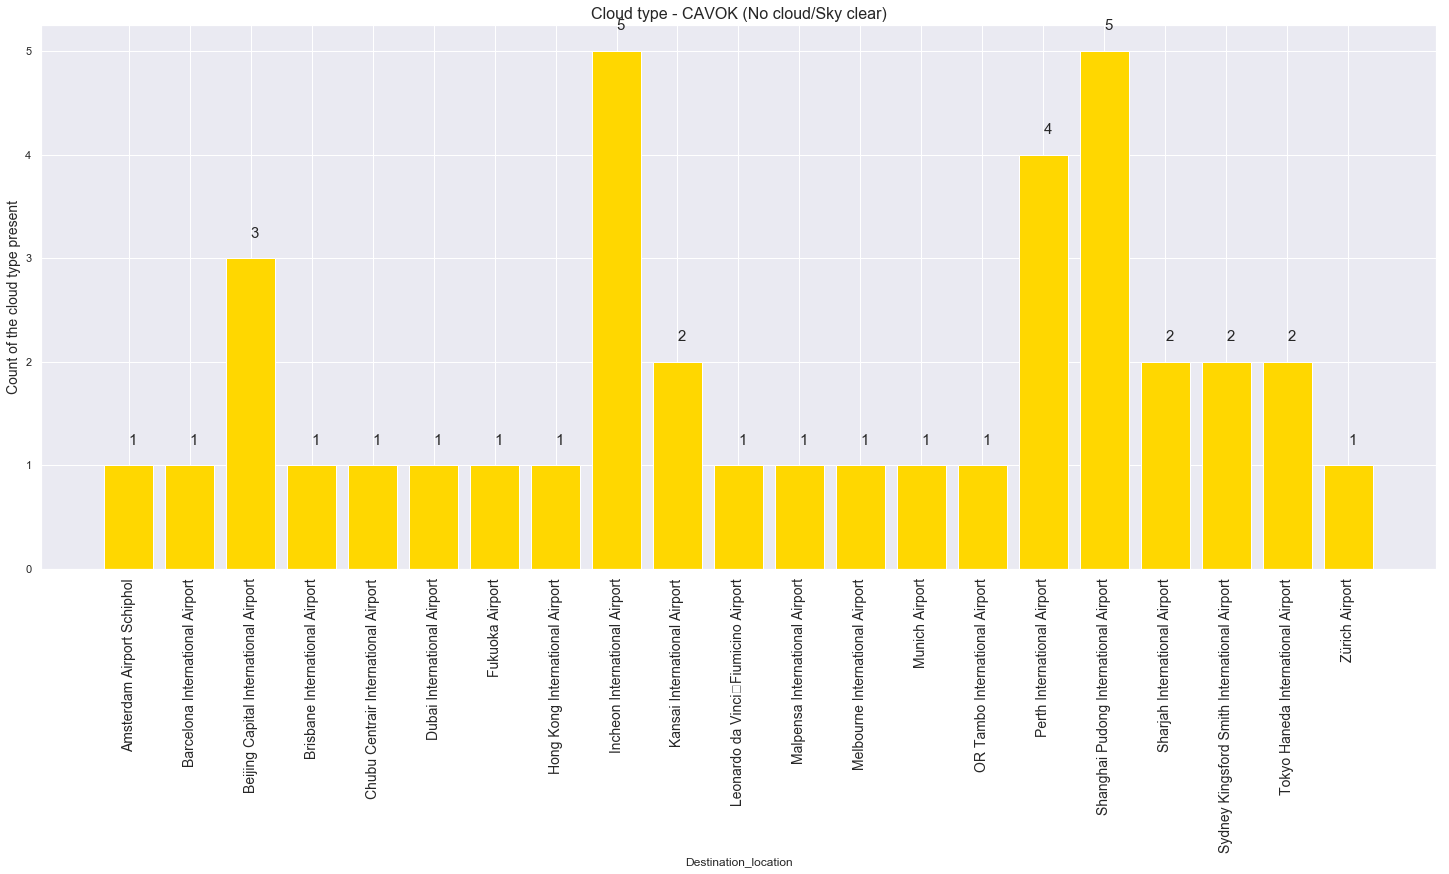

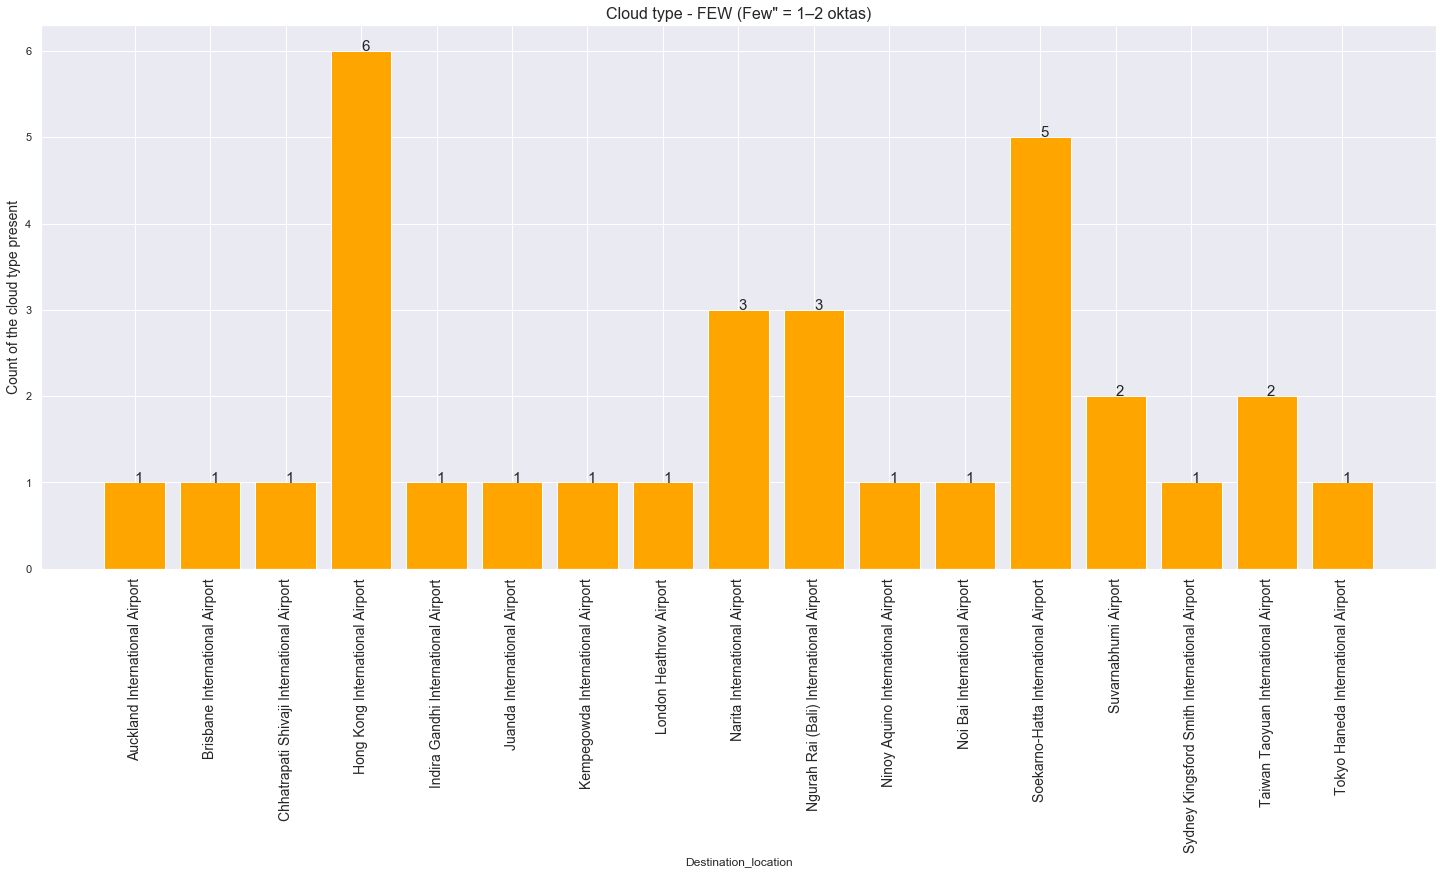

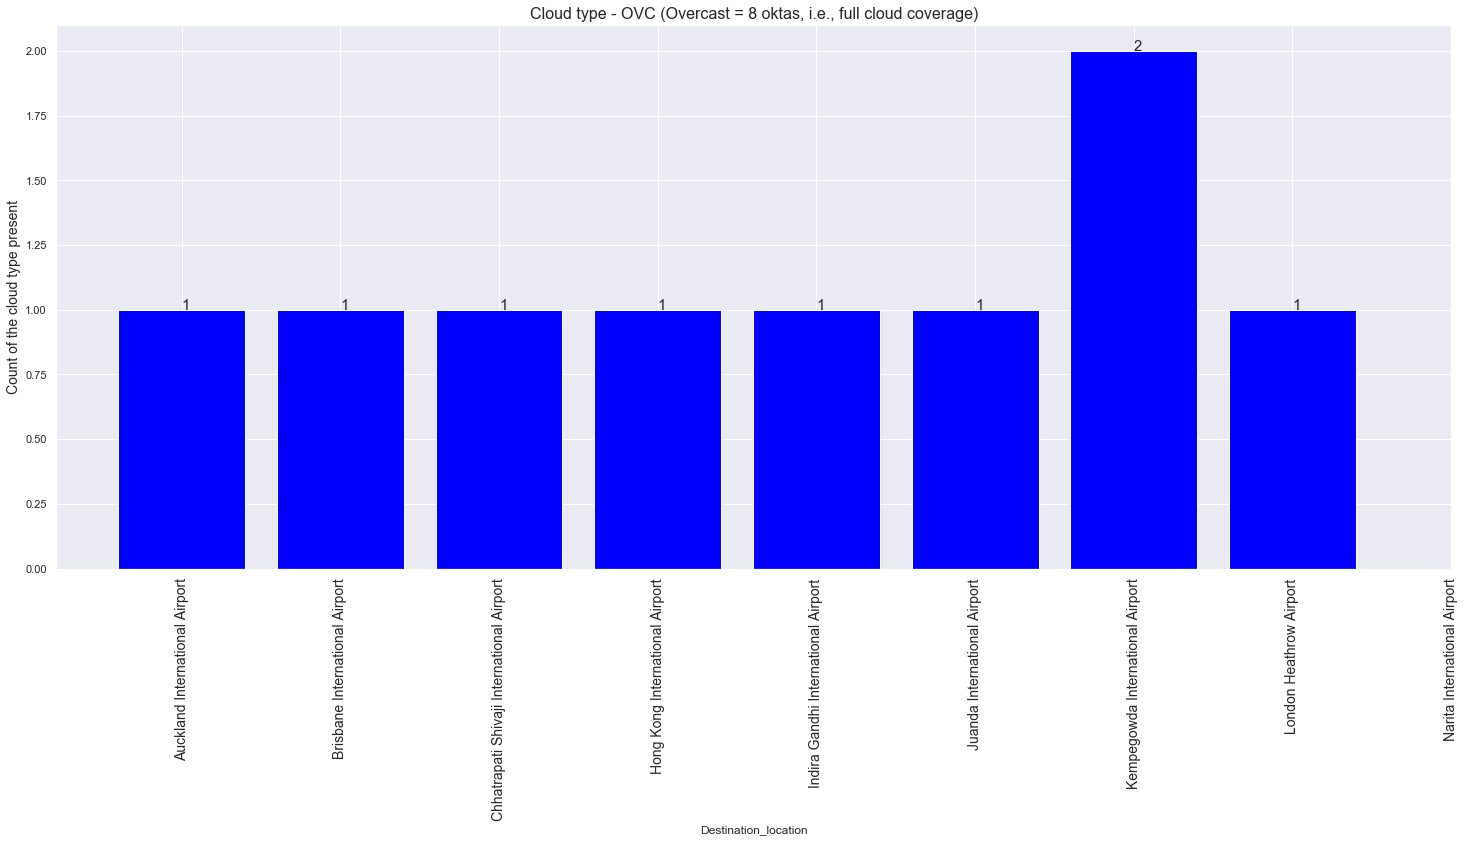

In [32]:
# We have plotted the comparitive bar plot analysis of each cloud type over the Destination Locations
flight_d_ct = pd.DataFrame(flight["Destination_location"])
flight_d_ct["Destination Cloud Type"] = "0.00"
flight_d_ct["Destination Cloud Type"] = flight["D_Cloud Type"]
flight_d_ct = flight_d_ct[flight_d_ct['Destination Cloud Type'].notnull()]
flight_d_ct["Cnt_Cloudtype_d"] = 1
flight_d_ct = flight_d_ct.groupby(['Destination_location','Destination Cloud Type']).agg({'Cnt_Cloudtype_d': 'sum'}).reset_index()

fdct1 = flight_d_ct[flight_d_ct["Destination Cloud Type"] == "BKN"].reset_index()
fdct2 = flight_d_ct[flight_d_ct["Destination Cloud Type"] == "SCT"].reset_index()
fdct3 = flight_d_ct[flight_d_ct["Destination Cloud Type"] == "CAVOK"].reset_index()
fdct4 = flight_d_ct[flight_d_ct["Destination Cloud Type"] == "FEW"].reset_index()
fdct5 = flight_d_ct[flight_d_ct["Destination Cloud Type"] == "OVC"].reset_index()

plt.figure(figsize=(25, 10))
plt.bar(fdct1["Destination_location"], fdct1["Cnt_Cloudtype_d"], color='#8B008B')
plt.xlabel('Destination_location', fontsize=12)
plt.ylabel('Count of the cloud type present', fontsize=14)
plt.xticks(range(19), fdct1["Destination_location"], fontsize=14, rotation=90)
plt.title('Cloud type - BKN (Broken" = 5–7 oktas)', fontsize=16)
for i in range(0,len(fdct1)):
    plt.text(fdct1["Destination_location"][i], fdct1["Cnt_Cloudtype_d"][i]+5, str(fdct1["Cnt_Cloudtype_d"][i]), fontsize=15)
plt.show()

plt.figure(figsize=(25, 10))
plt.bar(fdct2["Destination_location"], fdct2["Cnt_Cloudtype_d"], color='#FF4500')
plt.xlabel('Destination_location', fontsize=12)
plt.ylabel('Count of the cloud type present', fontsize=14)
plt.xticks(range(15), fdct2["Destination_location"], fontsize=14, rotation=90)
plt.title('Cloud type - SCT ("Scattered" = 3–4 oktas)', fontsize=16)
for i in range(0,len(fdct2)):
    plt.text(fdct2["Destination_location"][i], fdct2["Cnt_Cloudtype_d"][i]+0.2, str(fdct2["Cnt_Cloudtype_d"][i]), fontsize=15)
plt.show()

plt.figure(figsize=(25, 10))
plt.bar(fdct3["Destination_location"], fdct3["Cnt_Cloudtype_d"], color='#FFD700')
plt.xlabel('Destination_location', fontsize=12)
plt.ylabel('Count of the cloud type present', fontsize=14)
plt.xticks(range(21), fdct3["Destination_location"], fontsize=14, rotation=90)
plt.title('Cloud type - CAVOK (No cloud/Sky clear)', fontsize=16)
for i in range(0,len(fdct3)):
    plt.text(fdct3["Destination_location"][i], fdct3["Cnt_Cloudtype_d"][i]+0.2, str(fdct3["Cnt_Cloudtype_d"][i]), fontsize=15)
plt.show()

plt.figure(figsize=(25, 10))
plt.bar(fdct4["Destination_location"], fdct4["Cnt_Cloudtype_d"], color='#FFA500')
plt.xlabel('Destination_location', fontsize=12)
plt.ylabel('Count of the cloud type present', fontsize=14)
plt.xticks(range(17), fdct4["Destination_location"], fontsize=14, rotation=90)
plt.title('Cloud type - FEW (Few" = 1–2 oktas)', fontsize=16)
for i in range(0,len(fdct4)):
    plt.text(fdct4["Destination_location"][i], fdct4["Cnt_Cloudtype_d"][i], str(fdct4["Cnt_Cloudtype_d"][i]), fontsize=15)
plt.show()

plt.figure(figsize=(25, 10))
plt.bar(fdct5["Destination_location"], fdct5["Cnt_Cloudtype_d"], color='#0000FF')
plt.xlabel('Destination_location', fontsize=12)
plt.ylabel('Count of the cloud type present', fontsize=14)
plt.xticks(range(9), fdct4["Destination_location"], fontsize=14, rotation=90)
plt.title('Cloud type - OVC (Overcast = 8 oktas, i.e., full cloud coverage)', fontsize=16)
for i in range(0,len(fdct5)):
    plt.text(fdct5["Destination_location"][i], fdct5["Cnt_Cloudtype_d"][i], str(fdct5["Cnt_Cloudtype_d"][i]), fontsize=15)
plt.show()

<u><b><font size="5"><font color="#0000A0"><p style="font-family:Bodoni MT;"> Inference comparitive bar plot analysis of each cloud type over the Destination Locations visualization</p></font></font></b></u>
<font size="3"><font color="#006400">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. For the cloud type <b>BKN (broken), Singapore Changi Airport (109) & the Kuala Lumpuer Airport (3)</b>, occupies the first and the second position of the having the BKN type of cloud around the analysis period.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. For the cloud type <b>SCT (scattered), Singapore Changi Airport (8), Tan Son Nhat International Airport (5)</b>, occupies the first and the second position of the having the SCT type of cloud around the analysis period.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3. For the cloud type <b>CAVOK (Clear), Shanghai International Airport(5) and Incheon International Aiport (5) & the Perth International Airport (4)</b>, occupies the first and the second position of the having the CAVOK type of cloud around the analysis period, the others are seen in the above analysis<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4. For the cloud type <b>FEW (FEW), Hong Kong International Airport (6) & the Soekarno–Hatta International Airport (5)</b>, occupies the first and the second position of the having the FEW type of cloud around the analysis period.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5. For the cloud type <b>OVC (Overcast), Kempegowda Interational Airport(2) & Others(1)</b>, all occupies the first position of the having the OVC type of cloud around the analysis period. </font></font>

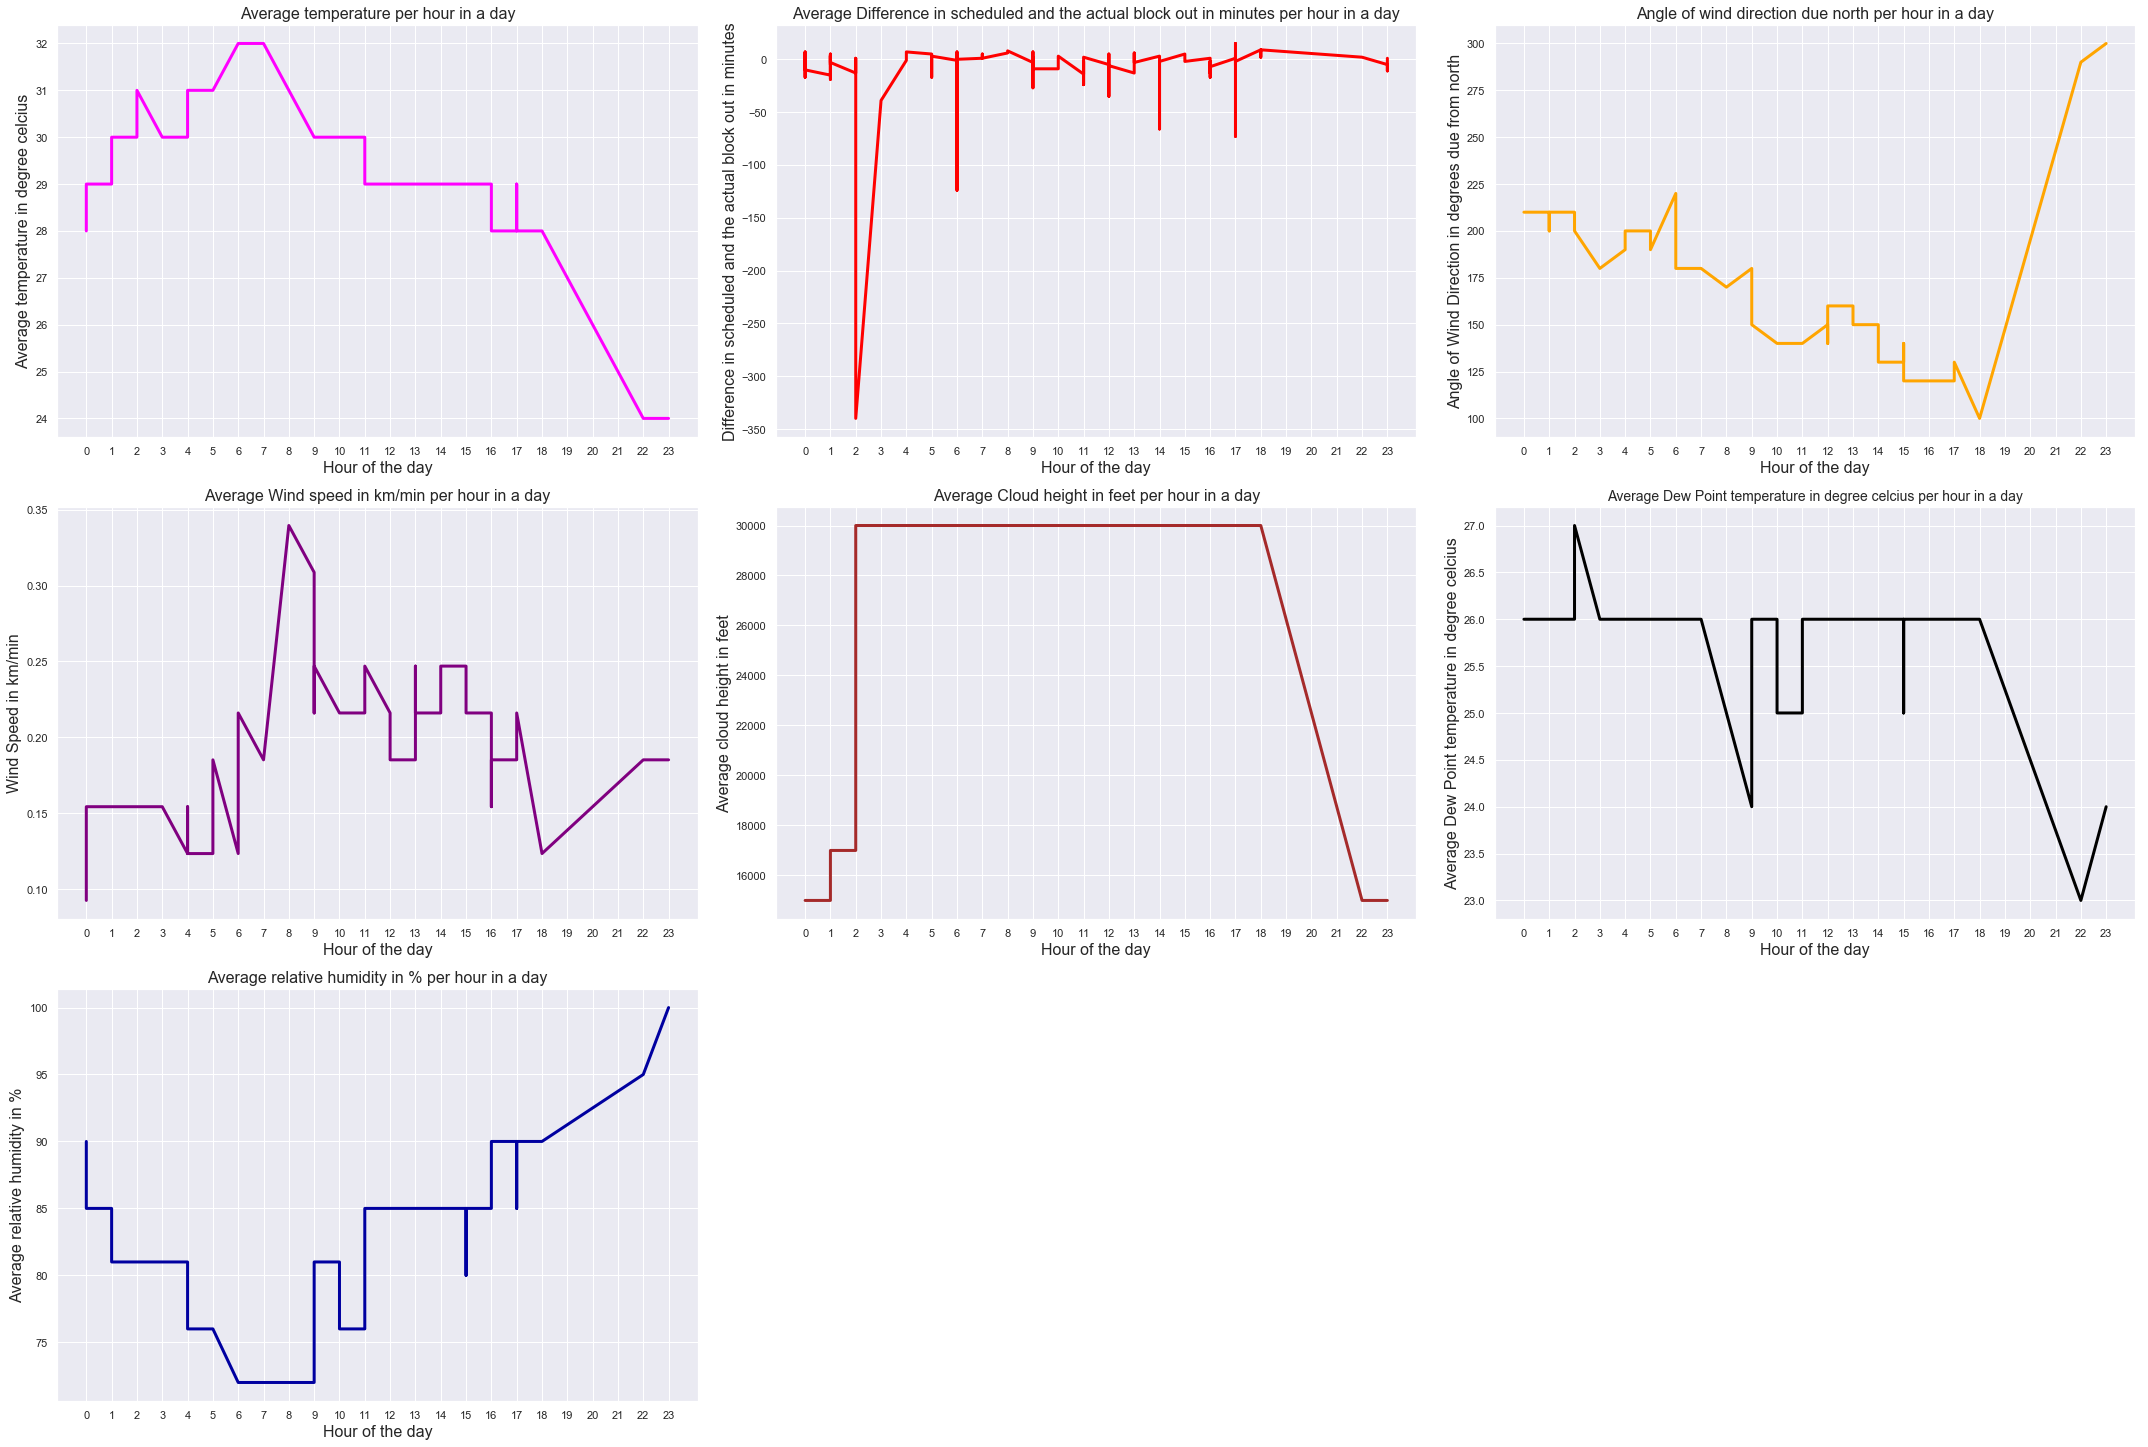

In [33]:
# Time series analysis of Singapore Changi Airport as the Origin Location over different weather and air traffic conditions
flight_ts = {'Departure time': flight["Actual Departure Time"], 'Delta Block out': flight["delta_Block_Out"],
                'Wind Direction': flight["O_Wind Direction"], 'Wind Speed km/min': flight["O_Wind Speed (km/min)"],
                'Cloud Height': flight["O_Cloud Height (ft AGL)"], 'Temperature': flight["O_Temp (C)"],
                'Dew Point': flight["O_Dew Point (C)"], 'Relative Humidity': flight["O_Rel. Humidity (%)"], 
                'Origin Location': flight["Origin_location"]}
flight_ts = pd.DataFrame(data=flight_ts).reset_index().drop(columns={"index"})
flight_ts = flight_ts[flight_ts["Origin Location"] == "Singapore Changi Airport"].reset_index().drop(columns={"index"})
flight_ts = flight_ts.sort_values(by=["Departure time"])
flight_ts["hour"] = 0
flight_ts["hour"] = pd.DatetimeIndex(flight_ts['Departure time']).hour

plt.figure(figsize=(30,20))
plt.subplot(3,3,1)
plt.tight_layout()
plt.plot(flight_ts["hour"], flight_ts["Temperature"], color="#FF00FF", linewidth=3.0)
plt.xlabel('Hour of the day', fontsize=16)
plt.ylabel('Average temperature in degree celcius', fontsize=16)
plt.title('Average temperature per hour in a day', fontsize=16)
plt.xticks(np.arange(min(flight_ts["hour"]), max(flight_ts["hour"])+1, 1.0))
plt.subplot(3,3,2)
plt.tight_layout()
plt.plot(flight_ts["hour"], flight_ts["Delta Block out"], color="red", linewidth=3.0)
plt.xlabel('Hour of the day', fontsize=16)
plt.ylabel('Difference in scheduled and the actual block out in minutes', fontsize=16)
plt.title('Average Difference in scheduled and the actual block out in minutes per hour in a day', fontsize=16)
plt.xticks(np.arange(min(flight_ts["hour"]), max(flight_ts["hour"])+1, 1.0))
plt.subplot(3,3,3)
plt.tight_layout()
plt.plot(flight_ts["hour"], flight_ts["Wind Direction"], color="orange", linewidth=3.0)
plt.xlabel('Hour of the day', fontsize=16)
plt.ylabel('Angle of Wind Direction in degrees due from north', fontsize=16)
plt.title('Angle of wind direction due north per hour in a day', fontsize=16)
plt.xticks(np.arange(min(flight_ts["hour"]), max(flight_ts["hour"])+1, 1.0))
plt.subplot(3,3,4)
plt.tight_layout()
plt.plot(flight_ts["hour"], flight_ts["Wind Speed km/min"], color="purple", linewidth=3.0)
plt.xlabel('Hour of the day', fontsize=16)
plt.ylabel('Wind Speed in km/min', fontsize=16)
plt.title('Average Wind speed in km/min per hour in a day', fontsize=16)
plt.xticks(np.arange(min(flight_ts["hour"]), max(flight_ts["hour"])+1, 1.0))
plt.subplot(3,3,5)
plt.tight_layout()
plt.plot(flight_ts["hour"], flight_ts["Cloud Height"], color="brown", linewidth=3.0)
plt.xlabel('Hour of the day', fontsize=16)
plt.ylabel('Average cloud height in feet', fontsize=16)
plt.title('Average Cloud height in feet per hour in a day', fontsize=16)
plt.xticks(np.arange(min(flight_ts["hour"]), max(flight_ts["hour"])+1, 1.0))
plt.subplot(3,3,6)
plt.tight_layout()
plt.plot(flight_ts["hour"], flight_ts["Dew Point"], color="black", linewidth=3.0)
plt.xlabel('Hour of the day', fontsize=16)
plt.ylabel('Average Dew Point temperature in degree celcius', fontsize=16)
plt.title('Average Dew Point temperature in degree celcius per hour in a day', fontsize=14)
plt.xticks(np.arange(min(flight_ts["hour"]), max(flight_ts["hour"])+1, 1.0))
plt.subplot(3,3,7)
plt.tight_layout()
plt.plot(flight_ts["hour"], flight_ts["Relative Humidity"], color="#0000A0", linewidth=3.0)
plt.xlabel('Hour of the day', fontsize=16)
plt.ylabel('Average relative humidity in %', fontsize=16)
plt.title('Average relative humidity in % per hour in a day', fontsize=16)
plt.xticks(np.arange(min(flight_ts["hour"]), max(flight_ts["hour"])+1, 1.0))
plt.show()

<u><b><font size="5"><font color="#0000A0"><p style="font-family:Bodoni MT;"> Inference Time series analysis of Singapore Changi Airport as the Origin Location over different weather and air traffic conditions visualization</p></font></font></b></u>
<font size="3"><font color="#006400">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. The first graph gives us the time series analysis of Temperature at Singapore Changi Aiport on the flight schedule day, and we can see that the average temperature increase from 00:00 till 9:00 am and then steadily decreases till 18:00 and then suddenly falls from 28 degrees to 24 degrees in 4 hours. So planning flight schedules during the early morning and before late evening is the ideal time to have the flight to be at optimized condition due to temperature.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. The second graph gives us the time series analysis of Delta BLock Out of Singapore Changi Aiport on the flight schedule day, and interestingly we can see that the block out is high during 2:00 AM, becasue fo the low temperatures and high relative humidity and low cloud height. These all parameters affect the flight schedules badly and hence the huge block out.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3. The Third graph gives us the time series analysis of Wind Direction at Singapore Changi Aiport on the flight schedule day, and interstingly we can see that the wind moves from South-West direction at 00:00 to East direction at 18:00 <b>but suddenly changes trhe direction to West in 3 hours steadily, this has a huge impact on the fuel effciency of burning less or more fuel depending on the wind direction.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4. The Fourth graph gives us the time series analysis of Average Wind speed at Singapore Changi Aiport on the flight schedule day, and interestingly we can see that the wind speed slowly increases from 00:00 and reaches a maximum at 9:00 AM, then suddenly falls ans steadies at the same speed throughtout the day.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5. The Fifth graph gives us the time series analysis of Average cloud height at Singapore Changi Aiport on the flight schedule day, and interestingly we can see that the clouds dissemble at 2:00 AM and maintained at the same height throughtout the day.<b>Here we ca see from the gropah and from the block out time graph, that the block out is high at the cloud shift, whihc means all the aircraft are schueduled to take-off one by one immediately at 2:00 AM, hence the block out.</b></b><br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6. The Sixth graph gives us the time series analysis of Dew Point temperature at Singapore Changi Aiport on the flight schedule day, and there is  the most insightful inference,that the dew point temperature has increased at 2:00 AM, becasue of the increase in temperature caused by the fuel burnt by the take-of aircrafts.<br><br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;7. The last graph gives us the time series analysis of Average relative humidity at Singapore Changi Aiport on the flight schedule day, and interestingly we can see that the relative humdity has decreased in the early mornings and then started to increase durin the day, as more temperature brings in moist air into Singapore.</font></font>

C:\Users\Lokesh Vairamuthu\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Lokesh Vairamuthu\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


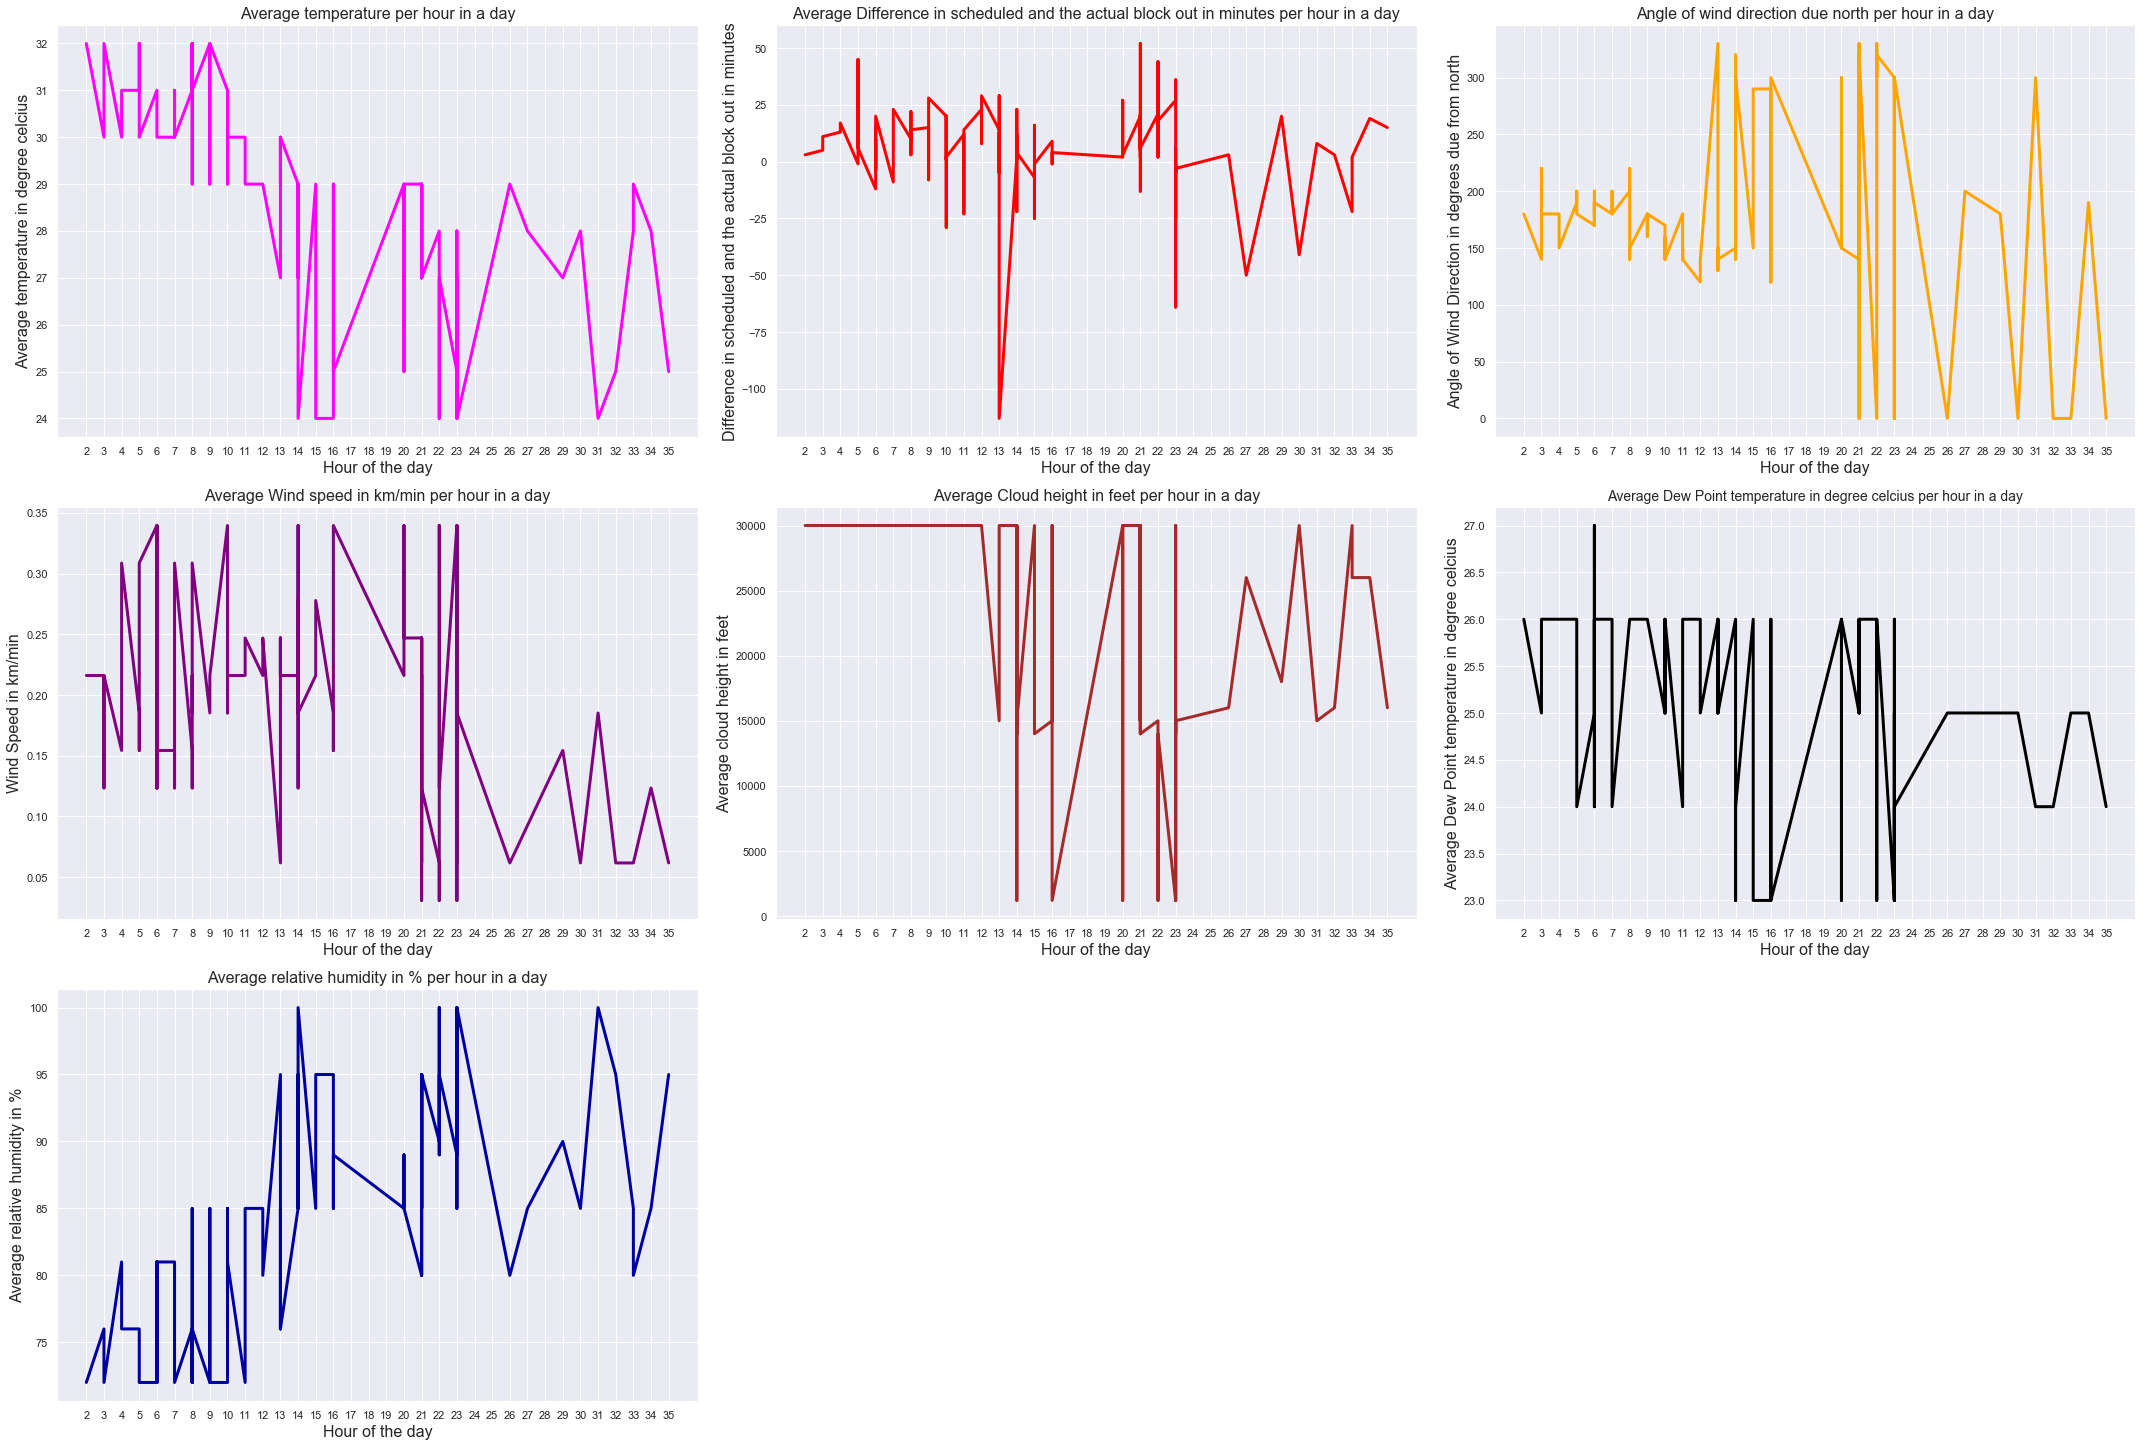

In [34]:
# Time series analysis of Singapore Changi Airport as the Destination Location over different weather and air traffic conditions
flight_ts_d = {'Arrival time': flight["Actual Arrival Time"], 'Delta Block in': flight["delta_Block_In"],
                'Wind Direction_D': flight["D_Wind Direction"], 'Wind Speed_D km/min': flight["D_Wind Speed (km/min)"],
                'Cloud Height_D': flight["D_Cloud Height (ft AGL)"], 'Temperature_D': flight["D_Temp (C)"],
                'Dew Point_D': flight["D_Dew Point (C)"], 'Relative Humidity_D': flight["D_Rel. Humidity (%)"], 
                'Destination Location': flight["Destination_location"]}
flight_ts_d = pd.DataFrame(data=flight_ts_d).reset_index().drop(columns={"index"})
flight_ts_d = flight_ts_d[flight_ts_d["Destination Location"] == "Singapore Changi Airport"].reset_index().drop(columns={"index"})
flight_ts_d = flight_ts_d.sort_values(by=["Arrival time"])
flight_ts_d["hour"] = 0
ref_day = pd.DatetimeIndex(flight_ts_d['Arrival time']).day
ref_hour = pd.DatetimeIndex(flight_ts_d['Arrival time']).hour
for i in range(0,len(flight_ts_d)):
    if(ref_day[i] == 29):
        flight_ts_d["hour"][i] = ref_hour[i]
    else:
        flight_ts_d["hour"][i] = ref_hour[i] + 24
flight_ts_d = flight_ts_d.reset_index()
flight_ts_d = flight_ts_d.sort_values(by=["index"]).drop(columns={"index"})

plt.figure(figsize=(30,20))
plt.subplot(3,3,1)
plt.tight_layout()
plt.plot(flight_ts_d["hour"], flight_ts_d["Temperature_D"], color="#FF00FF", linewidth=3.0)
plt.xlabel('Hour of the day', fontsize=16)
plt.ylabel('Average temperature in degree celcius', fontsize=16)
plt.title('Average temperature per hour in a day', fontsize=16)
plt.xticks(np.arange(min(flight_ts_d["hour"]), max(flight_ts_d["hour"])+1, 1.0))
plt.subplot(3,3,2)
plt.tight_layout()
plt.plot(flight_ts_d["hour"], flight_ts_d["Delta Block in"], color="red", linewidth=3.0)
plt.xlabel('Hour of the day', fontsize=16)
plt.ylabel('Difference in scheduled and the actual block out in minutes', fontsize=16)
plt.title('Average Difference in scheduled and the actual block out in minutes per hour in a day', fontsize=16)
plt.xticks(np.arange(min(flight_ts_d["hour"]), max(flight_ts_d["hour"])+1, 1.0))
plt.subplot(3,3,3)
plt.tight_layout()
plt.plot(flight_ts_d["hour"], flight_ts_d["Wind Direction_D"], color="orange", linewidth=3.0)
plt.xlabel('Hour of the day', fontsize=16)
plt.ylabel('Angle of Wind Direction in degrees due from north', fontsize=16)
plt.title('Angle of wind direction due north per hour in a day', fontsize=16)
plt.xticks(np.arange(min(flight_ts_d["hour"]), max(flight_ts_d["hour"])+1, 1.0))
plt.subplot(3,3,4)
plt.tight_layout()
plt.plot(flight_ts_d["hour"], flight_ts_d["Wind Speed_D km/min"], color="purple", linewidth=3.0)
plt.xlabel('Hour of the day', fontsize=16)
plt.ylabel('Wind Speed in km/min', fontsize=16)
plt.title('Average Wind speed in km/min per hour in a day', fontsize=16)
plt.xticks(np.arange(min(flight_ts_d["hour"]), max(flight_ts_d["hour"])+1, 1.0))
plt.subplot(3,3,5)
plt.tight_layout()
plt.plot(flight_ts_d["hour"], flight_ts_d["Cloud Height_D"], color="brown", linewidth=3.0)
plt.xlabel('Hour of the day', fontsize=16)
plt.ylabel('Average cloud height in feet', fontsize=16)
plt.title('Average Cloud height in feet per hour in a day', fontsize=16)
plt.xticks(np.arange(min(flight_ts_d["hour"]), max(flight_ts_d["hour"])+1, 1.0))
plt.subplot(3,3,6)
plt.tight_layout()
plt.plot(flight_ts_d["hour"], flight_ts_d["Dew Point_D"], color="black", linewidth=3.0)
plt.xlabel('Hour of the day', fontsize=16)
plt.ylabel('Average Dew Point temperature in degree celcius', fontsize=16)
plt.title('Average Dew Point temperature in degree celcius per hour in a day', fontsize=14)
plt.xticks(np.arange(min(flight_ts_d["hour"]), max(flight_ts_d["hour"])+1, 1.0))
plt.subplot(3,3,7)
plt.tight_layout()
plt.plot(flight_ts_d["hour"], flight_ts_d["Relative Humidity_D"], color="#0000A0", linewidth=3.0)
plt.xlabel('Hour of the day', fontsize=16)
plt.ylabel('Average relative humidity in %', fontsize=16)
plt.title('Average relative humidity in % per hour in a day', fontsize=16)
plt.xticks(np.arange(min(flight_ts_d["hour"]), max(flight_ts_d["hour"])+1, 1.0))
plt.show()

<u><b><font size="5"><font color="#0000A0"><p style="font-family:Bodoni MT;"> Inference Time series analysis of Singapore Changi Airport as the Destination Location over different weather and air traffic conditions visualization</p></font></font></b></u>
<font size="3"><font color="#006400">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. The first graph gives us the time series analysis of Temperature at Singapore Changi Aiport on the flight schedule day, and we can see that the average temperature is high during 00:00 and has randomly reduced and has seen huge fluctuations, <b>meaning that day would have seen sun and heavy rain.</b><br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. The second and the fifth graph together gives us the time series analysis of Delta BLock In of Singapore Changi Aiport on the flight schedule day and the cloud height at the sdame day, and interestingly we can see that the <b>block in is high during 13:00 and the same time the cloud height has changed heavily causing the block In. These all parameters affect the flight schedules badly and hence the huge block In</b>.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3. The Third graph gives us the time series analysis of Wind Direction at Singapore Changi Aiport on the flight schedule day, and interstingly we can see that the <b>wind moves in South direction at 00:00 till 13:00, and then starts to flcutuate from west to east very randomly, indicating there is a huge storm in Singapore Aiport</b>.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4. The Fourth graph gives us the time series analysis of Average Wind speed at Singapore Changi Aiport on the flight schedule day, and interestingly we can see that the wind speed is very high and fluctuates ranomly till 20;00.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5. The Sixth graph gives us the time series analysis of Dew Point temperature at Singapore Changi Aiport on the flight schedule day, <b>and there is  the most insightful inference,that the dew point temperature has steadied till 13:00 and then suddenly drops at 13:00 indicating  huge change in the weather.</b><br><br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6. The last graph gives us the time series analysis of Average relative humidity at Singapore Changi Aiport on the flight schedule day, and as discussed already, <b>the relative humidity has increased after 13:00 indicating a very heavy down pour at the Singapore Changi Airport.</b></font></font>

<u><b><font size="5"><font color="#0000A0"><p style="font-family:Bodoni MT;"> Conclusion </p></font></font></b></u>
<font size="3"><font color="#006400">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. Thus all the analysis from the bar chart, box plot, geo map analysis and comparitive bar plot and time series analysis, we have found the best combination of parameters to look for to have optimization in the flight schedules and efficient flight.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp'2. Moreover, we nned more data to finalize the ideal conditions to manipulate the right parameters to have the most optimized flight schedules.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3. We have got the parameter analysis of the different conditions of analysis possible.<br><br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4. Links that have been used for the analysis of getting the ICAO airport codes.<br>

1.	www.b737mrg.net/downloads/icao_world.xls<br>
2.	https://github.com/datasets/airport-codes<br>
3.	https://raw.githubusercontent.com/datasets/airport-codes/master/data/airport-codes.csv
</font></font>